# Diarrhea Prediction

## Description

This notebook presents a comprehensive analysis and machine learning prediction model based on datasets from five divisions in Bangladesh.

### Objectives

- **Data Exploration**: Conduct an in-depth exploration of the datasets, identifying key features and relationships that characterize each division.
- **Statistical Analysis**: Utilize statistical methods to analyze the data, revealing significant trends and anomalies within the divisions.
- **Machine Learning Models**: Implement various machine learning algorithms to build predictive models that forecast outcomes based on historical data.
- **Comparative Insights**: Compare results across the five divisions to highlight unique characteristics and shared challenges, providing a holistic view of the region.

[link to the dataset](https://github.com/Data-Lab-CU/diarrhea/tree/main/data)

### Importing all the libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose

### Data Preprocessing

In [104]:
# Loading the datasets
chattogram = pd.read_csv('https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Chattogram.csv')
dhaka = pd.read_csv('https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Dhaka.csv')
khulna = pd.read_csv('https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Khulna.csv')
rajshahi = pd.read_csv('https://raw.githubusercontent.com/Data-Lab-CU/diarrhea/main/data/Rajshahi.csv')

# Converting 'Date' columns to datetime
rajshahi['Date'] = pd.to_datetime(rajshahi['Date'])
khulna['Date'] = pd.to_datetime(khulna['Date'])
dhaka['Date'] = pd.to_datetime(dhaka['Date'])
chattogram['Date'] = pd.to_datetime(chattogram['Date'])

# Combining all datasets into one
data = pd.concat([rajshahi, khulna, dhaka, chattogram])

# Converting 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Dropping rows with missing values
data.dropna(inplace=True)

## Exploratory Data Analysis


> Let's start by addressing some key questions:

  1. What is the trend of diarrhea cases over time in each division?
  
  2. How do temperature, humidity, and precipitation correlate with diarrhea cases?
  3. Are there any significant differences in diarrhea cases among the four divisions?

### Primary Line Plot

In [105]:
# Plotting the trend of diarrhea cases over time for each division
fig = px.line(rajshahi, x='Date', y='Diarrhea', title='Diarrhea Cases in Rajshahi', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()
fig = px.line(khulna, x='Date', y='Diarrhea', title='Diarrhea Cases in Khulna', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()
fig = px.line(dhaka, x='Date', y='Diarrhea', title='Diarrhea Cases in Dhaka', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()
fig = px.line(chattogram, x='Date', y='Diarrhea', title='Diarrhea Cases in Chattogram', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()

> The trend plots for diarrhea cases over time in the four divisions (Rajshahi, Khulna, Dhaka, and Chattogram) reveal the following:

1. **Rajshahi:** Diarrhea cases show fluctuations over time with noticeable peaks and dips.

2. **Khulna:** Similar to Rajshahi, Khulna also exhibits fluctuations in diarrhea cases, with some periods showing higher cases.

3. **Dhaka:** The trend in Dhaka shows a more consistent pattern with fewer extreme peaks compared to Rajshahi and Khulna.

4. **Chattogram:** Chattogram displays a relatively stable trend with minor fluctuations in diarrhea cases.

Overall, each division shows variability in diarrhea cases over time, with some divisions experiencing more pronounced peaks and troughs than others.

> Now, Let's Analyze the correlation between **diarrhea cases** and the **weather variables** *(minimum temperature, maximum temperature, humidity, and precipitation)* for each division.

> We'll calculate the correlation coefficients and visualize them using heatmaps.

### Heatmaps

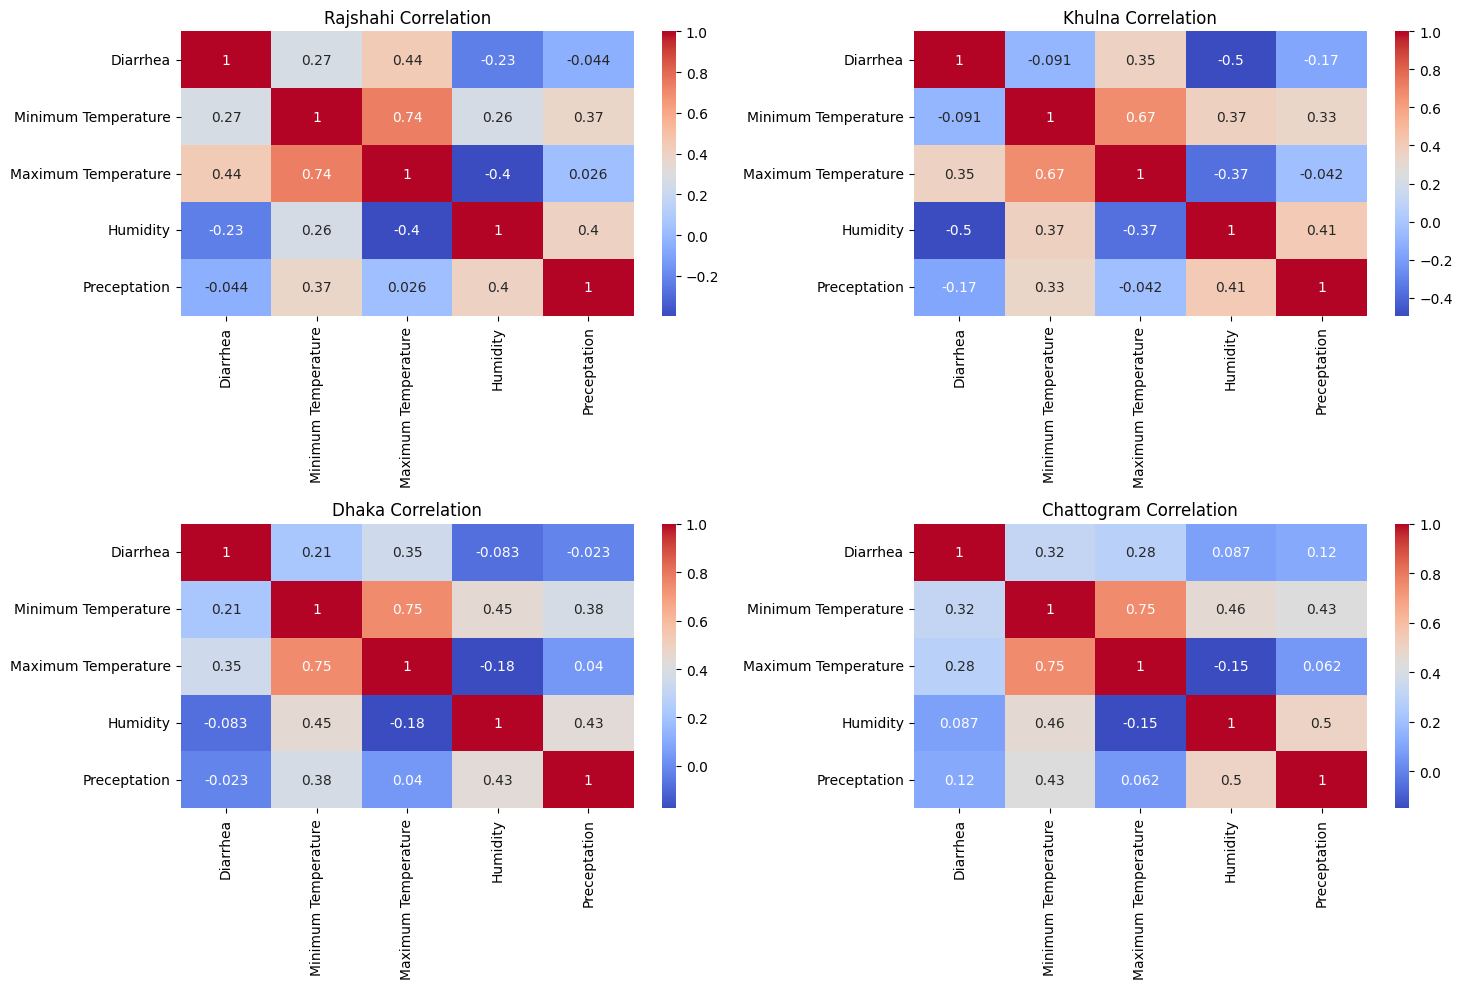

In [106]:
# Calculating correlation matrices
rajshahi_corr = rajshahi[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()
khulna_corr = khulna[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()
dhaka_corr = dhaka[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()
chattogram_corr = chattogram[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()

# Plotting heatmaps
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.heatmap(rajshahi_corr, annot=True, cmap='coolwarm', ax=axes[0, 0]).set_title('Rajshahi Correlation')
sns.heatmap(khulna_corr, annot=True, cmap='coolwarm', ax=axes[0, 1]).set_title('Khulna Correlation')
sns.heatmap(dhaka_corr, annot=True, cmap='coolwarm', ax=axes[1, 0]).set_title('Dhaka Correlation')
sns.heatmap(chattogram_corr, annot=True, cmap='coolwarm', ax=axes[1, 1]).set_title('Chattogram Correlation')
plt.tight_layout()
plt.show()

> The correlation heatmaps for each division reveal the following:

1. **Rajshahi:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

2. **Khulna:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

3. **Dhaka:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

4. **Chattogram:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

Overall, minimum temperature appears to have the strongest correlation with diarrhea cases across all divisions, while other weather variables show weaker correlations.

> Let's perform a **time series analysis** to identify any seasonal patterns or trends in diarrhea cases for each division.

> We'll use decomposition to separate the time series into trend, seasonal, and residual components.

### Time Series Analysis

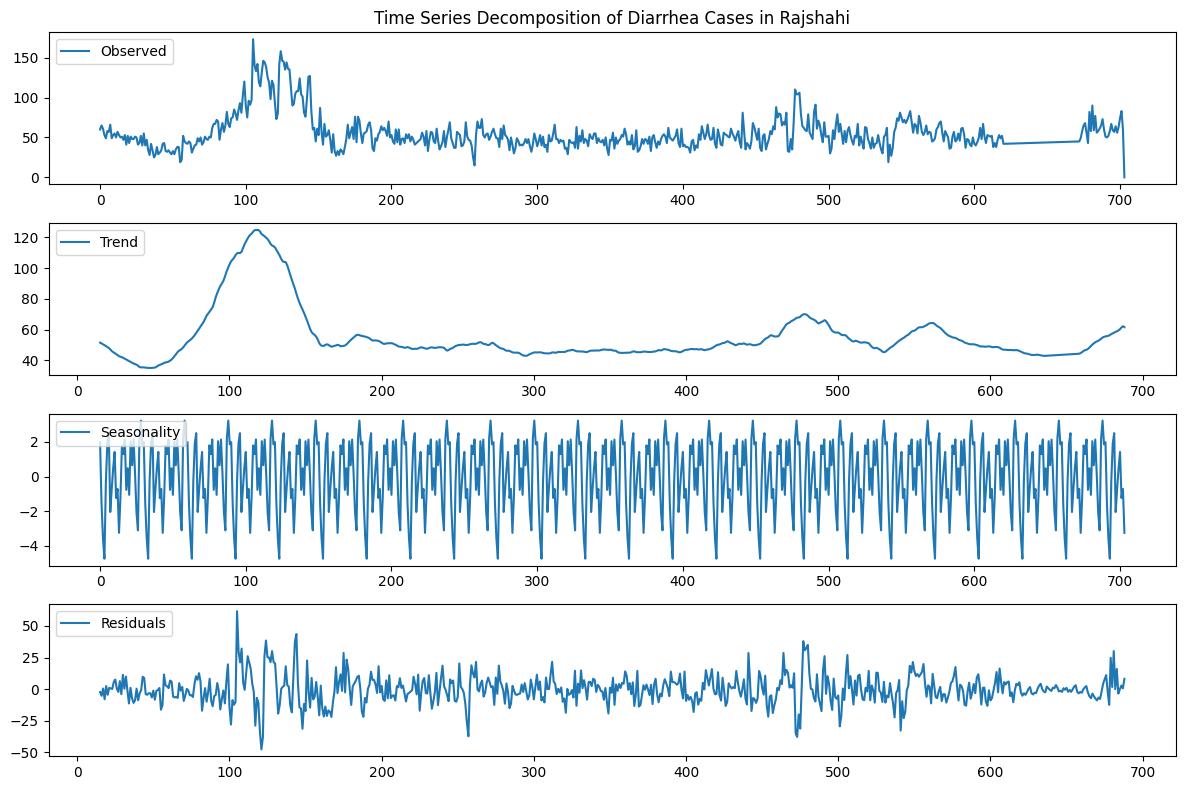

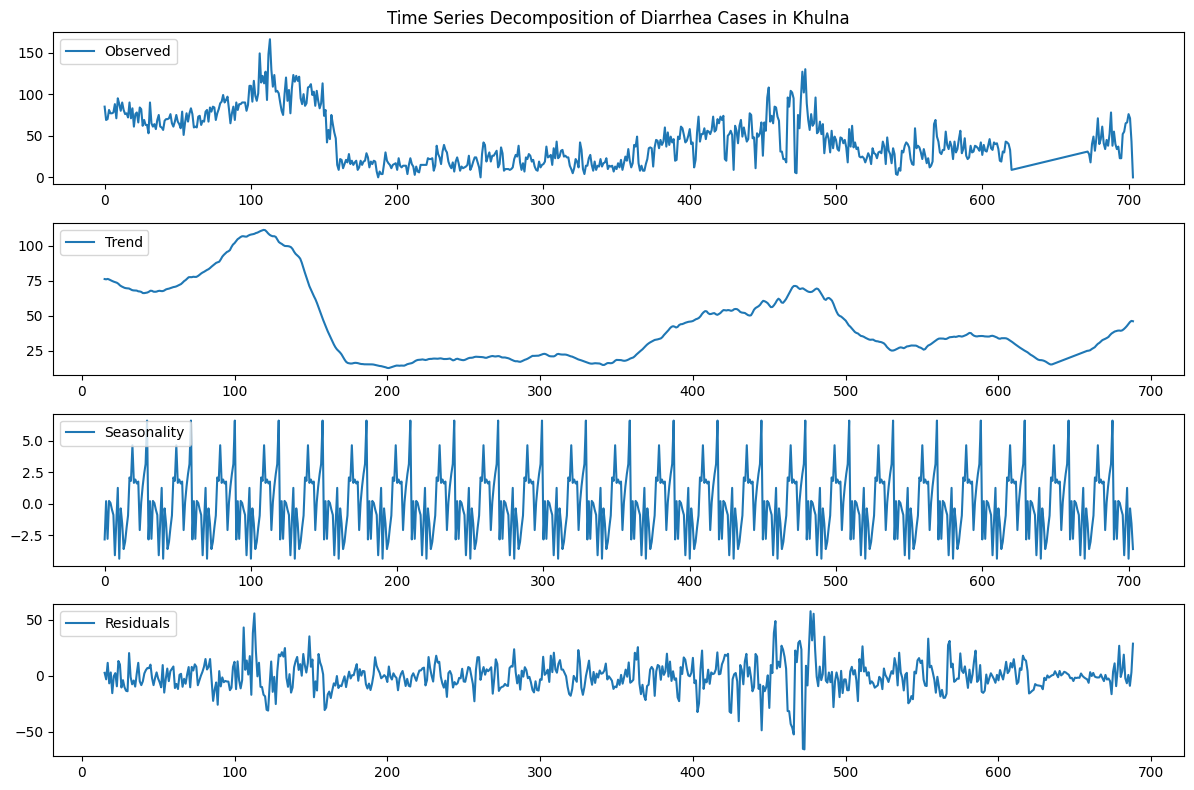

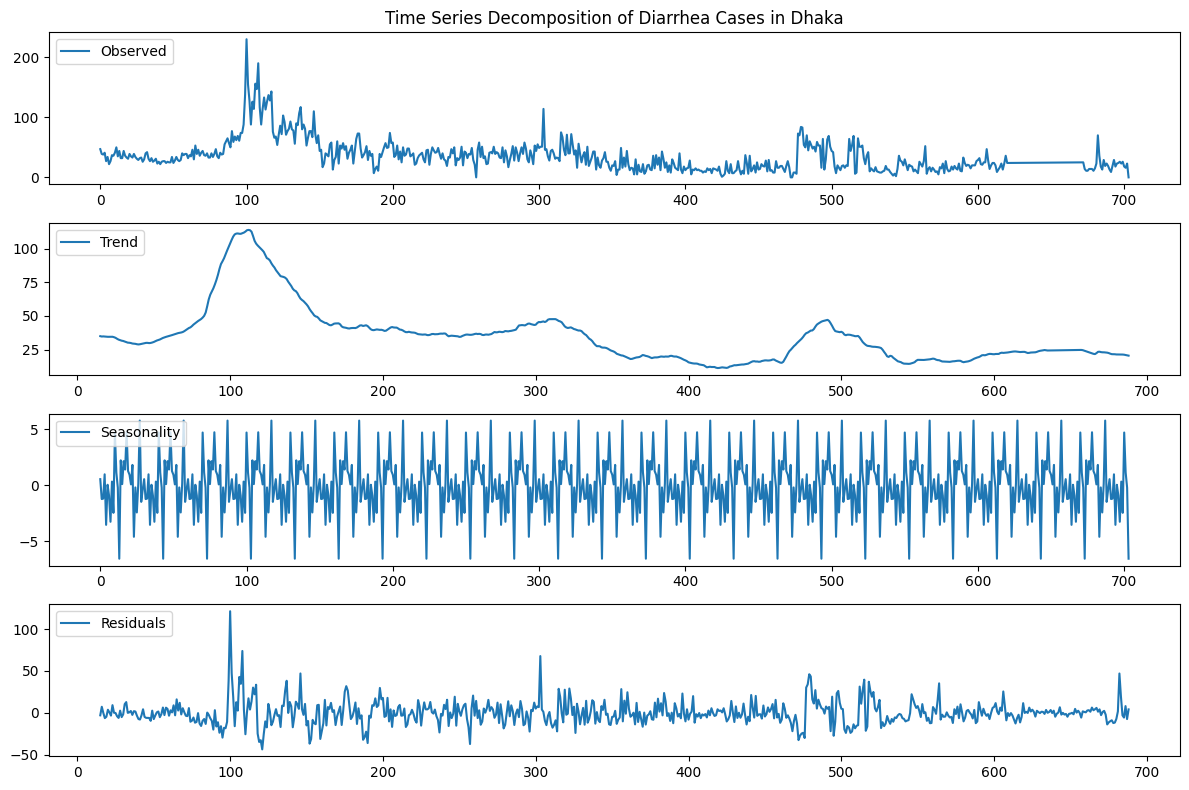

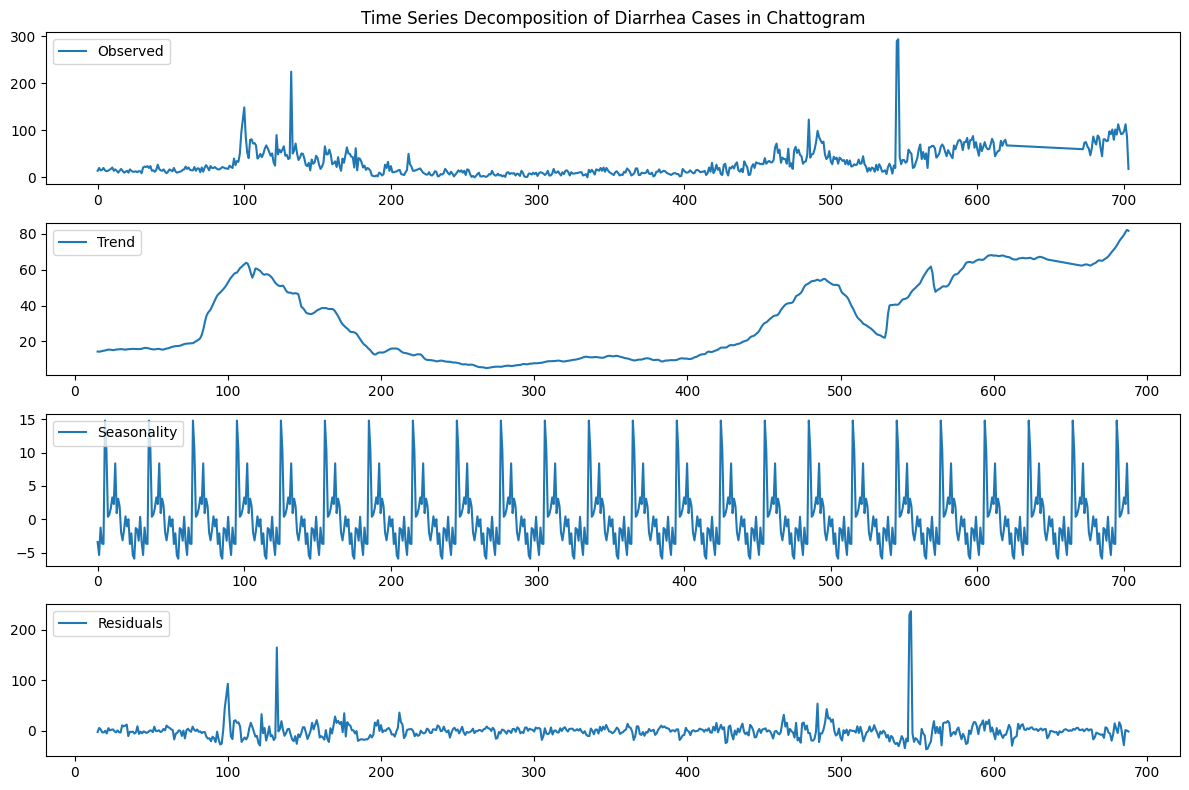

In [107]:
# Function to perform decomposition and plot
def decompose_and_plot(df, division_name):
    decomposition = seasonal_decompose(df['Diarrhea'], model='additive', period=30) # Assuming a periodicity of ~30 days

    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.title(f'Time Series Decomposition of Diarrhea Cases in {division_name}')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


# Performing decomposition and plot for each division
decompose_and_plot(rajshahi, 'Rajshahi')
decompose_and_plot(khulna, 'Khulna')
decompose_and_plot(dhaka, 'Dhaka')
decompose_and_plot(chattogram, 'Chattogram')

> The time series decomposition of diarrhea cases for each division reveals the following:

1. **Rajshahi:** The decomposition shows a clear seasonal pattern with periodic peaks and troughs, along with a noticeable trend component.

2. **Khulna:** Similar to Rajshahi, Khulna exhibits a seasonal pattern and a trend component, indicating periodic fluctuations in diarrhea cases.

3. **Dhaka:** The seasonal pattern in Dhaka is less pronounced compared to Rajshahi and Khulna, but a trend component is still evident.

4. **Chattogram:** Chattogram shows a relatively stable seasonal pattern with minor fluctuations and a clear trend component.

Overall, all divisions exhibit some degree of seasonality and trend in diarrhea cases, with Rajshahi and Khulna showing more pronounced seasonal patterns.

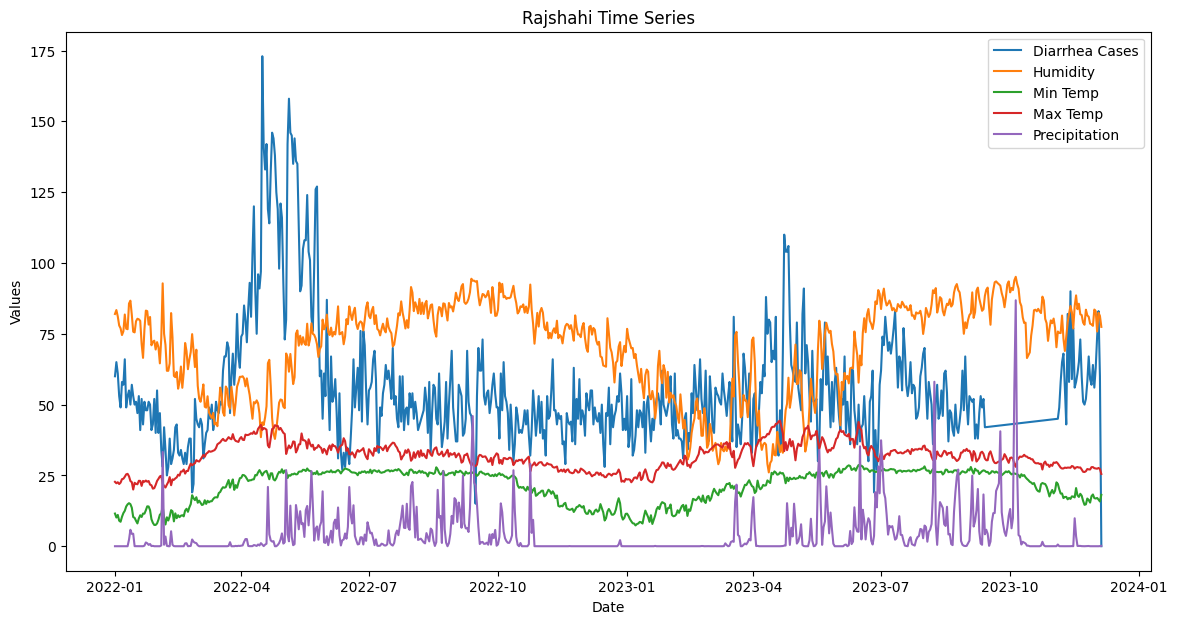

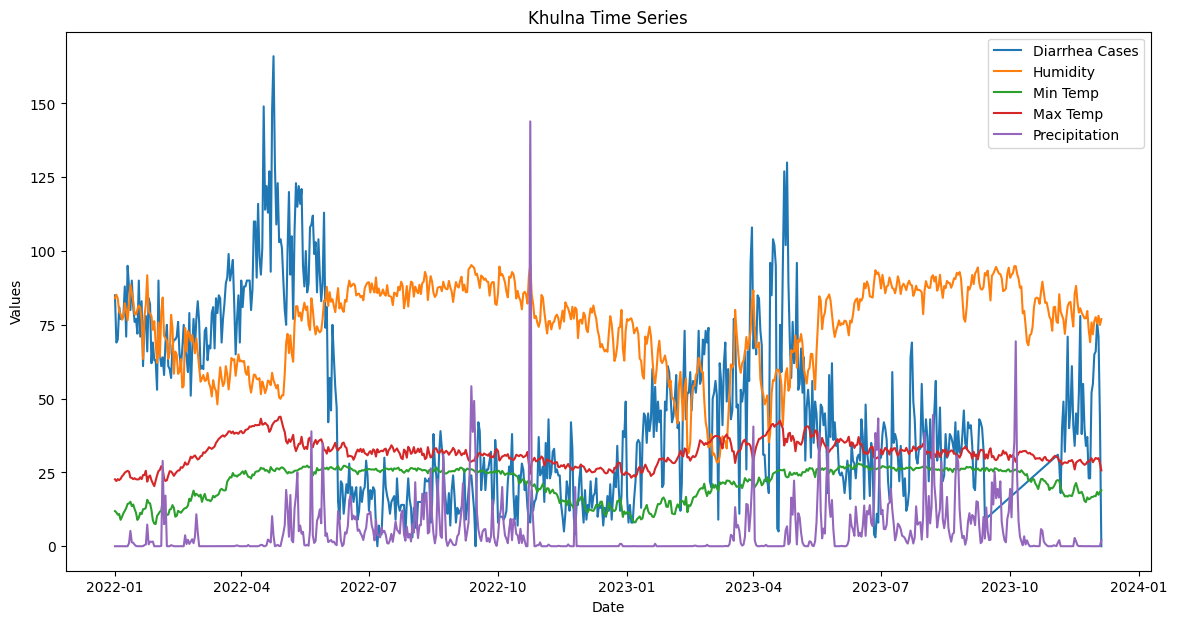

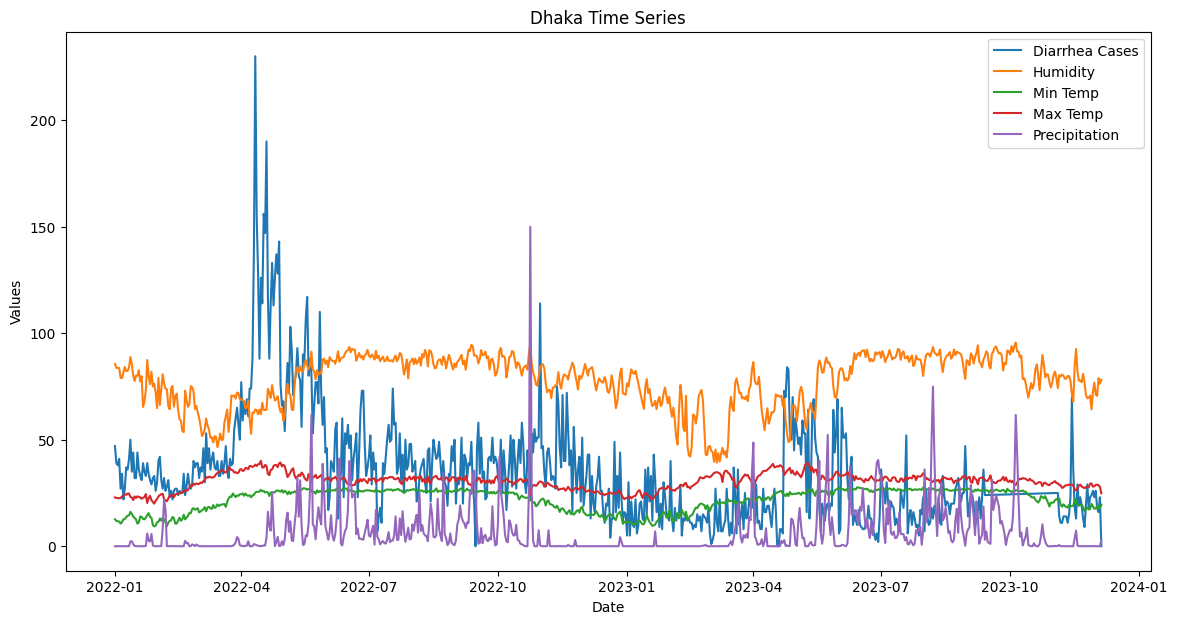

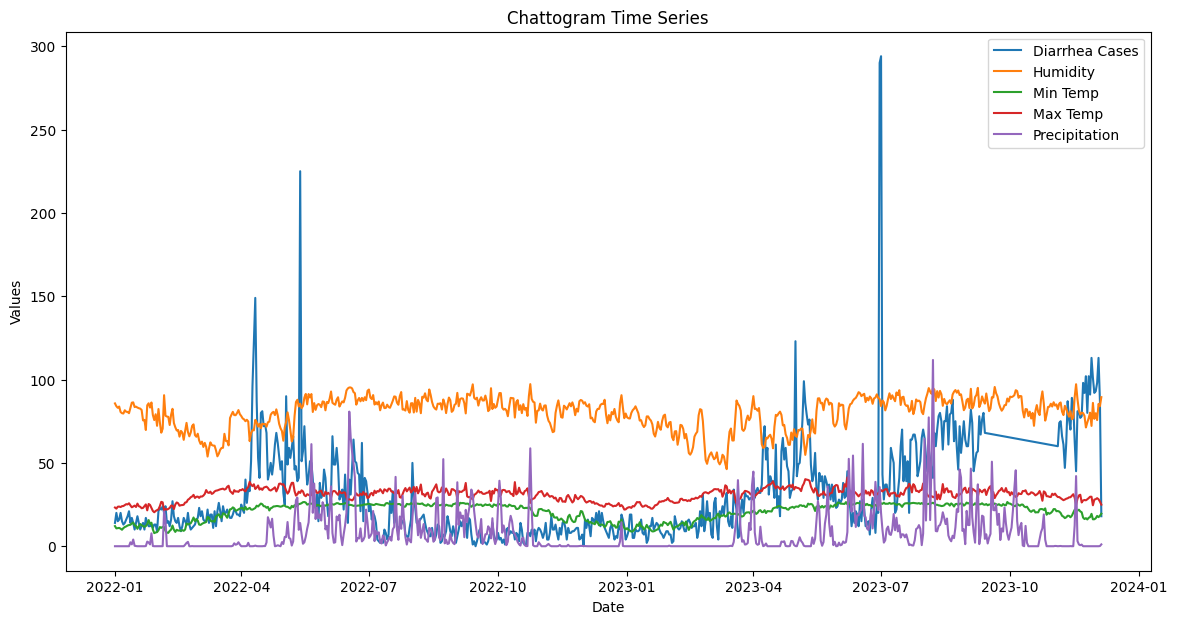

In [108]:
# Ploting time series for each division
def plot_time_series(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Diarrhea'], label='Diarrhea Cases')
    plt.plot(df['Date'], df['Humidity'], label='Humidity')
    plt.plot(df['Date'], df['Minimum Temperature'], label='Min Temp')
    plt.plot(df['Date'], df['Maximum Temperature'], label='Max Temp')
    plt.plot(df['Date'], df['Preceptation'], label='Precipitation')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.show()

plot_time_series(rajshahi, 'Rajshahi Time Series')
plot_time_series(khulna, 'Khulna Time Series')
plot_time_series(dhaka, 'Dhaka Time Series')
plot_time_series(chattogram, 'Chattogram Time Series')

> The time series plots for each division show the following trends:

1. **Rajshahi:** Diarrhea cases fluctuate over time, with noticeable peaks. Humidity and minimum temperature also show seasonal variations, while precipitation has sporadic spikes.

2. **Khulna:** Diarrhea cases exhibit periodic peaks. Humidity and minimum temperature display seasonal patterns, and precipitation shows occasional high values.

3. **Dhaka:** Diarrhea cases have periodic peaks. Humidity and minimum temperature follow seasonal trends, and precipitation has irregular spikes.

4. **Chattogram:** Diarrhea cases show periodic peaks. Humidity and minimum temperature vary seasonally, and precipitation has sporadic high values.

Overall, diarrhea cases appear to have a seasonal pattern, potentially influenced by humidity and temperature variations.

## Model Prediction

In [109]:
# Define features (X) and target (y)
X = data[['Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']]
y = data['Diarrhea']

In [110]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

Minimum Temperature  Maximum Temperature  Humidity  Preceptation
450                21.58                35.98     51.50          0.66
470                24.89                40.46     56.06          0.00
488                24.30                34.66     69.31          9.73
314                17.14                29.18     79.94          0.00
236                24.89                32.30     83.44          3.87
..                   ...                  ...       ...           ...
346                13.77                24.55     77.88          0.00
261                24.96                32.59     89.38         16.31
185                24.83                33.33     85.00          3.06
601                24.76                30.08     93.44         20.63
337                14.47                26.02     80.06          0.00

[564 rows x 4 columns]

In [111]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.7) #Actual values in red
    plt.scatter(y_test, y_pred, color='green', label='Predicted', alpha=0.7) # Predicted in green
    plt.xlabel("Actual Diarrhea Cases")
    plt.ylabel("Predicted Diarrhea Cases")
    plt.title(f"Actual vs. Predicted Diarrhea Cases ({model_name})")
    plt.legend()
    plt.show()

### Linear Regression

--- Linear Regression ---
Mean Squared Error: 577.2807990262904
R-squared: 0.20405291349473997


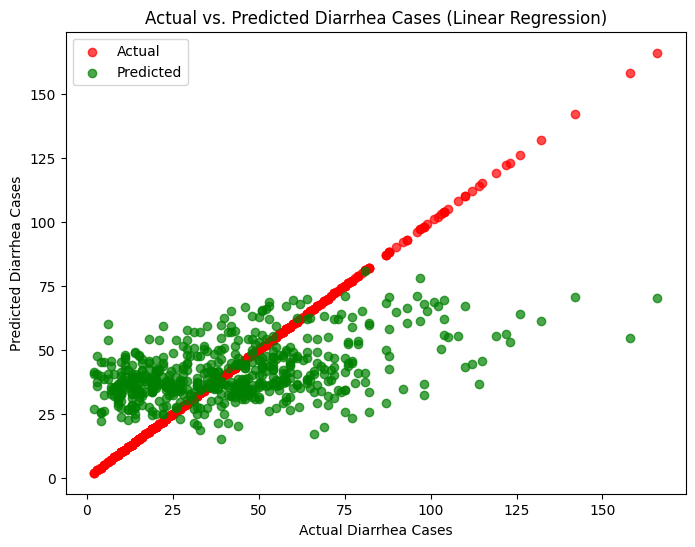

In [112]:
# (Your existing code for Linear Regression)
dt_model = LinearRegression()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
plot_actual_vs_predicted(y_test, dt_y_pred, "Linear Regression")

### Random Forest

--- Random Forest ---
Mean Squared Error: 551.132282153311
R-squared: 0.2401061407224373


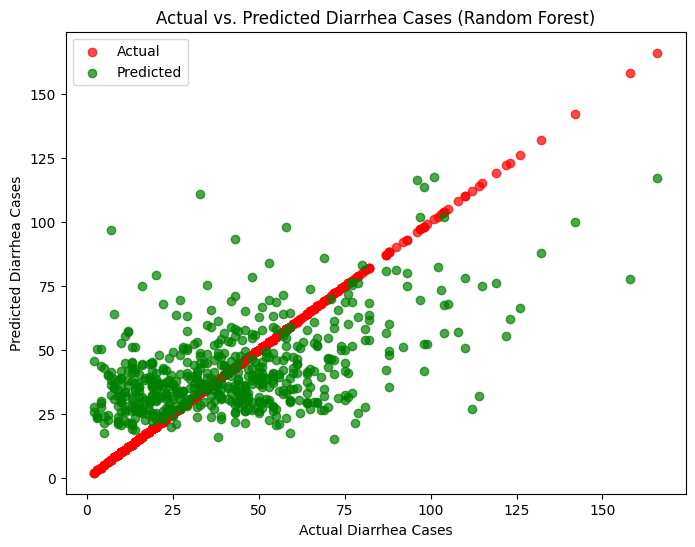

In [113]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
plot_actual_vs_predicted(y_test, rf_y_pred, "Random Forest")

### Support Vector Regression (SVR)

--- SVR ---
Mean Squared Error: 613.0715291001958
R-squared: 0.1547051309697165


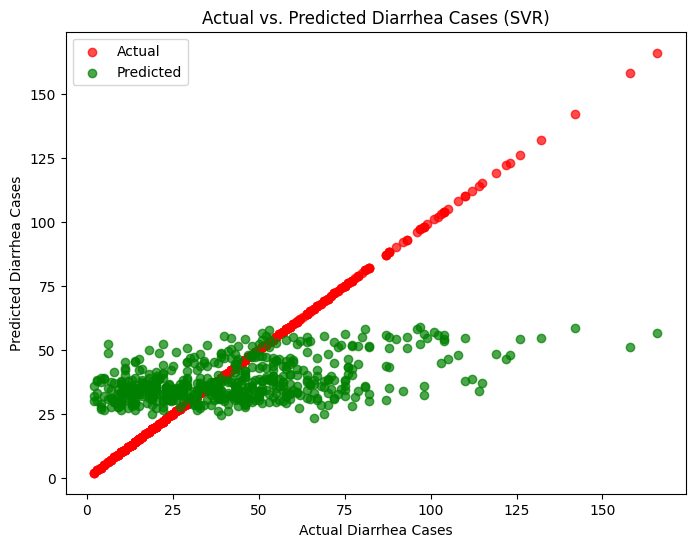

In [114]:
# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
plot_actual_vs_predicted(y_test, svr_y_pred, "SVR")

### Decision Tree

--- Decision Tree ---
Mean Squared Error: 1092.1848837026312
R-squared: -0.5058899890217985


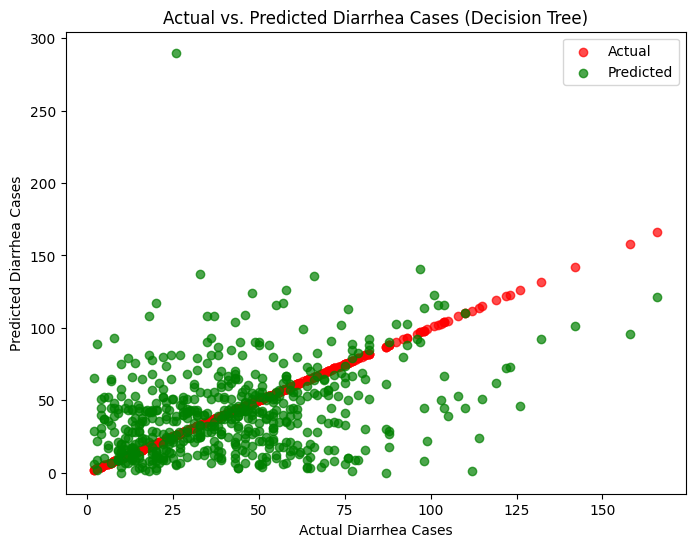

In [115]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
plot_actual_vs_predicted(y_test, dt_y_pred, "Decision Tree")

### RFGBT

--- Random Forest with Gradient Boosting ---
Mean Squared Error: 511.01546033038557
R-squared: 0.2954186810038161


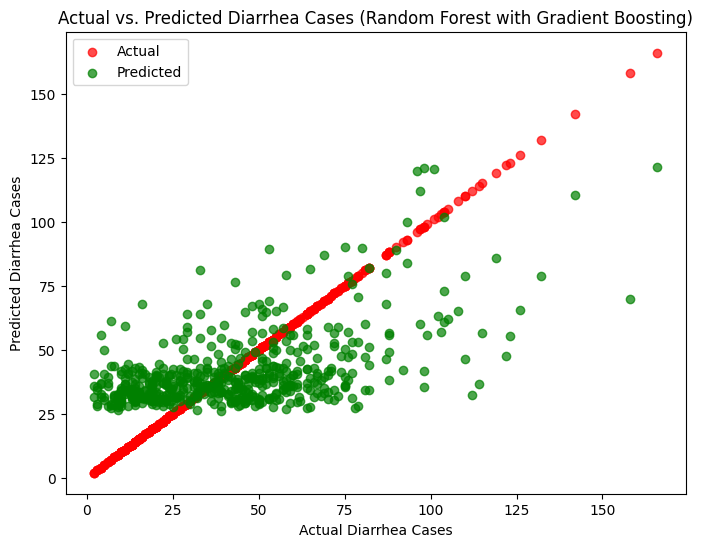

In [116]:
rfgbt_model = GradientBoostingRegressor(random_state=42)
rfgbt_model.fit(X_train, y_train)
rfgbt_y_pred = rfgbt_model.predict(X_test)
plot_actual_vs_predicted(y_test, rfgbt_y_pred, "Random Forest with Gradient Boosting")

### RFXBT

--- Gradient Boosting ---
Mean Squared Error: 511.01546033038557
R-squared: 0.2954186810038161


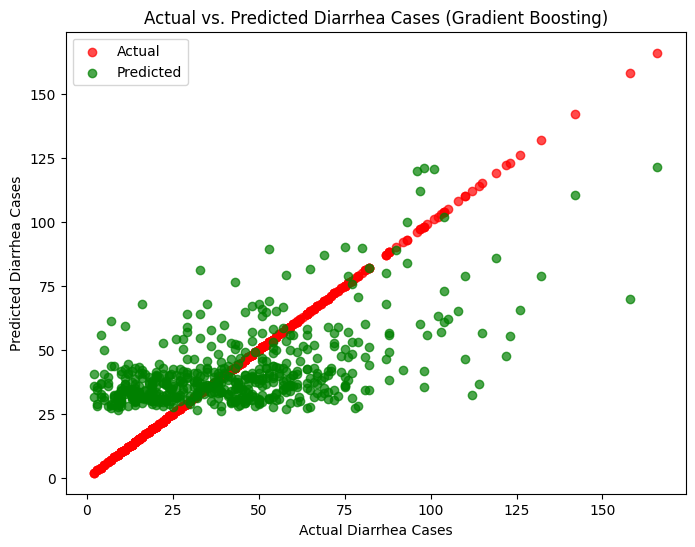

In [117]:
rfxbt_model = GradientBoostingRegressor(random_state=42)
rfxbt_model.fit(X_train, y_train)
rfxbt_y_pred = rfxbt_model.predict(X_test)
plot_actual_vs_predicted(y_test, rfxbt_y_pred, "Gradient Boosting")

## Model Prediction with Lagged Features

### Random Forest

--- Random Forest with 0 day Lagged Features ---
Mean Squared Error: 551.132282153311
R-squared: 0.2401061407224373


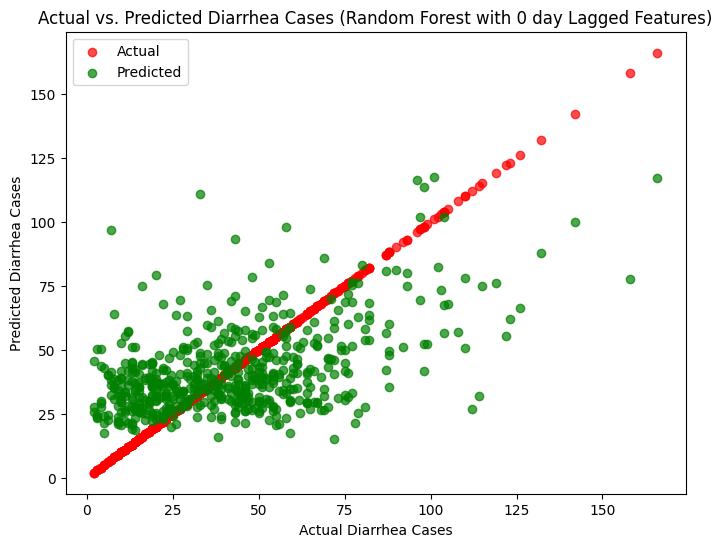

--- Random Forest with 1 day Lagged Features ---
Mean Squared Error: 688.208608548614
R-squared: 0.20375219672537426


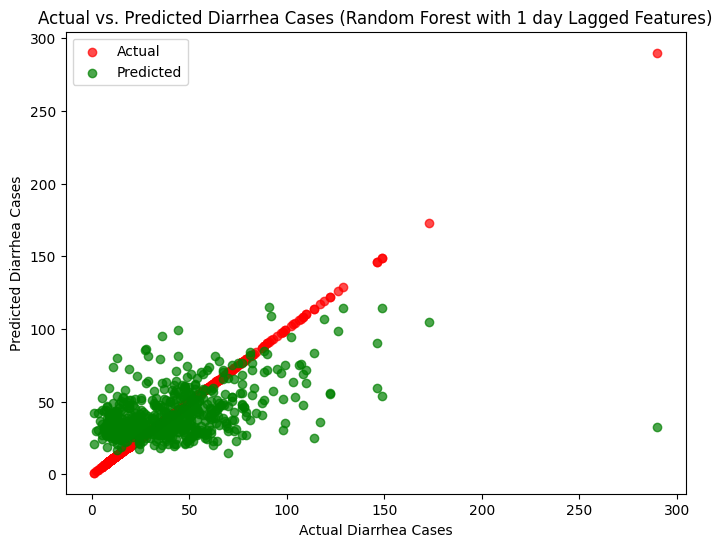

--- Random Forest with 2 day Lagged Features ---
Mean Squared Error: 641.7392326686601
R-squared: 0.260931712102374


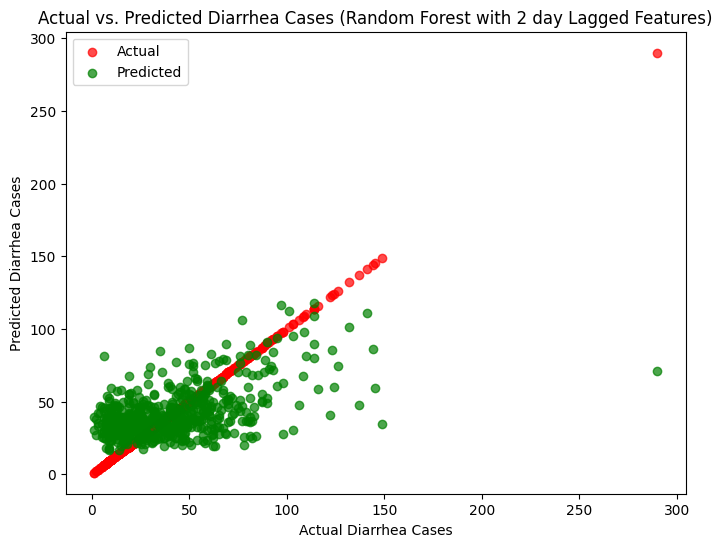

--- Random Forest with 3 day Lagged Features ---
Mean Squared Error: 714.0354217137694
R-squared: 0.2202907853033118


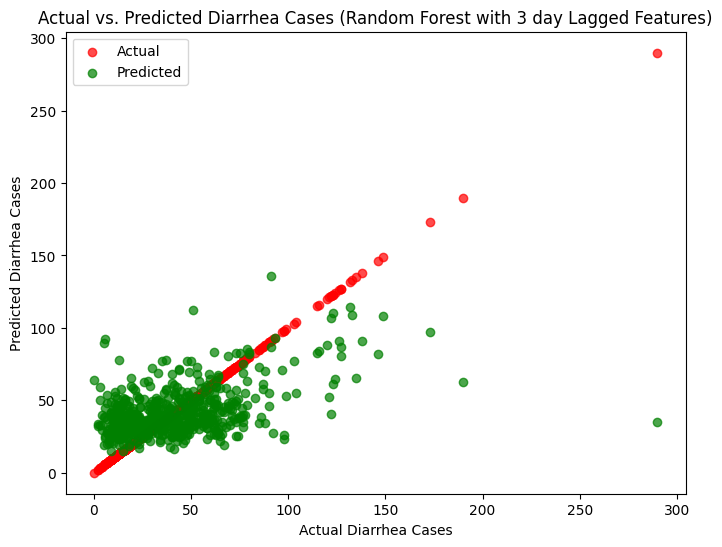

--- Random Forest with 4 day Lagged Features ---
Mean Squared Error: 561.6514160994303
R-squared: 0.22517113880768702


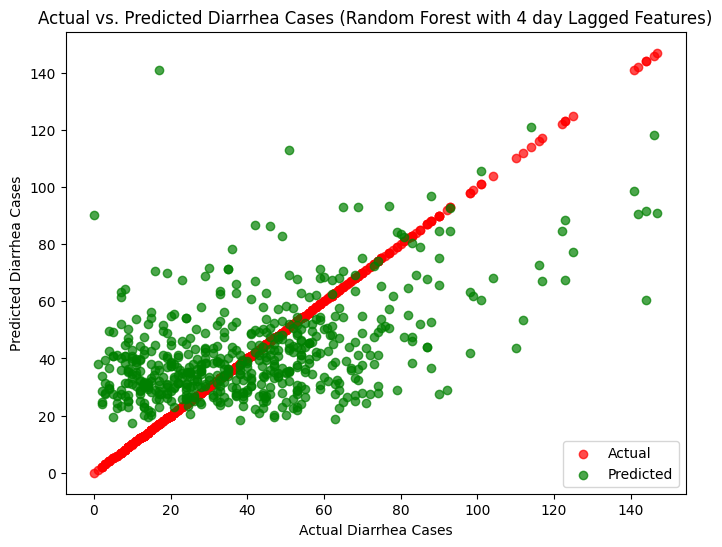

--- Random Forest with 5 day Lagged Features ---
Mean Squared Error: 613.210108653452
R-squared: 0.20170352987528395


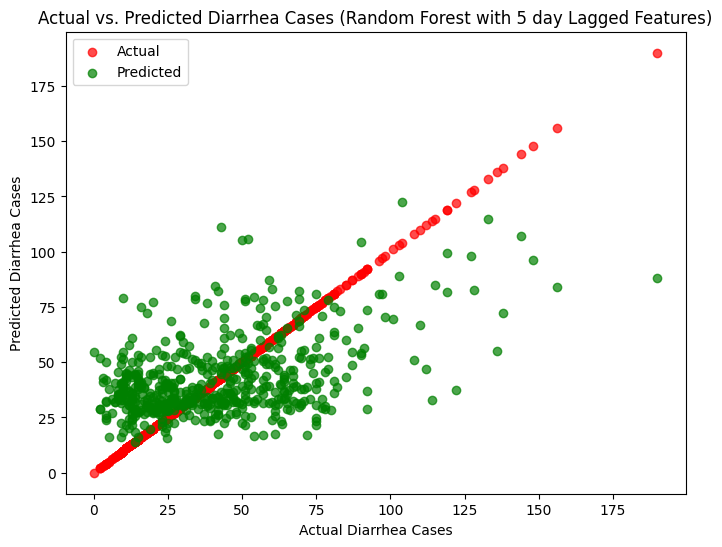

--- Random Forest with 6 day Lagged Features ---
Mean Squared Error: 817.966446722004
R-squared: 0.13846297917209371


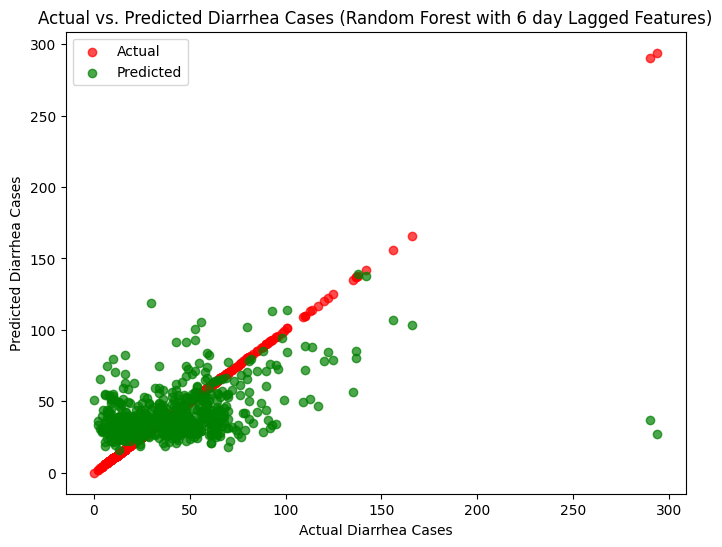

--- Random Forest with 7 day Lagged Features ---
Mean Squared Error: 735.4720164820405
R-squared: 0.1773185814810515


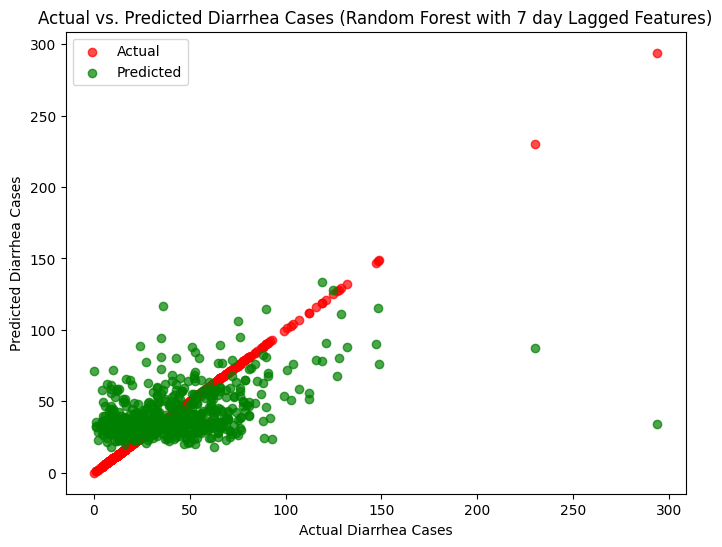

--- Random Forest with 8 day Lagged Features ---
Mean Squared Error: 688.9888089212108
R-squared: 0.2285385582462246


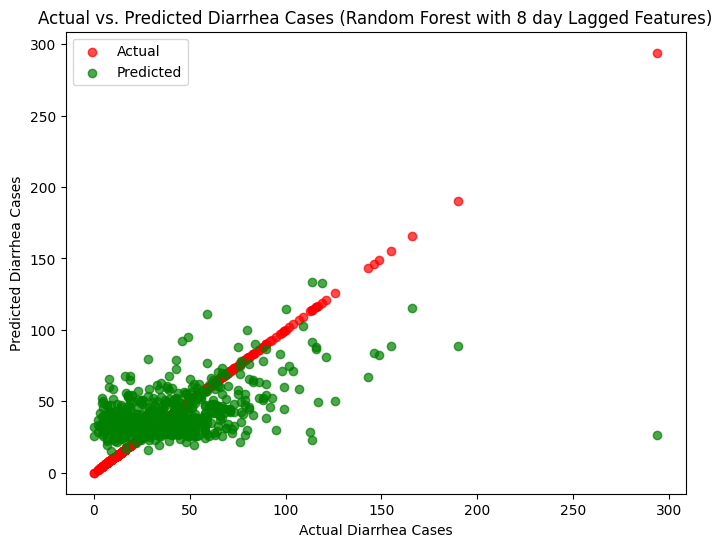

--- Random Forest with 9 day Lagged Features ---
Mean Squared Error: 693.5404171347576
R-squared: 0.1953008467061964


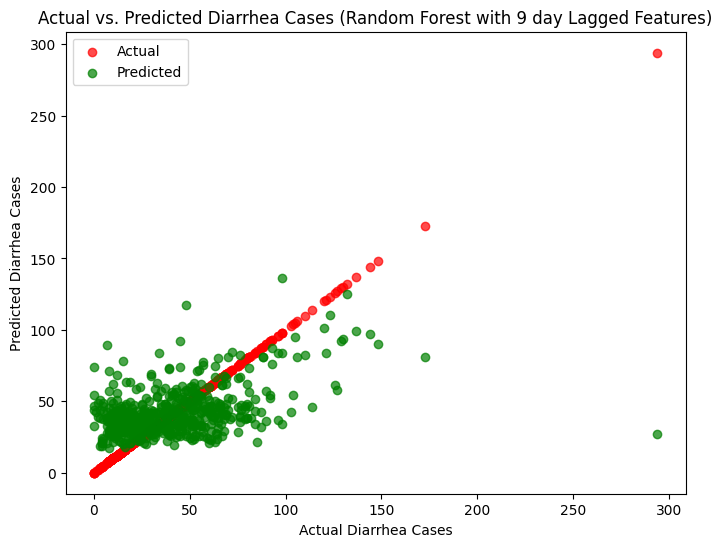

In [118]:
i = 0
while i < 10:
  # Create lagged dataset
  X_lagged = X.shift(i)  # Shift features back by one time step
  y_current = y  # Current time step's diarrhea

  # Remove first row (which will have NaN after shifting)
  X_lagged = X_lagged.iloc[i:]
  y_current = y_current.iloc[i:]

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_current, test_size=0.2, random_state=42)

  # Train Random Forest model
  rf_model = RandomForestRegressor(random_state=42)
  rf_model.fit(X_train, y_train)

  # Make predictions
  rf_y_pred = rf_model.predict(X_test)

  # Plot actual vs predicted
  plot_actual_vs_predicted(y_test, rf_y_pred, f"Random Forest with {i} day Lagged Features")

  i+=1

### Linear Regression

--- Linear Regression with 0 day Lagged Features ---
Mean Squared Error: 577.2807990262904
R-squared: 0.20405291349473997


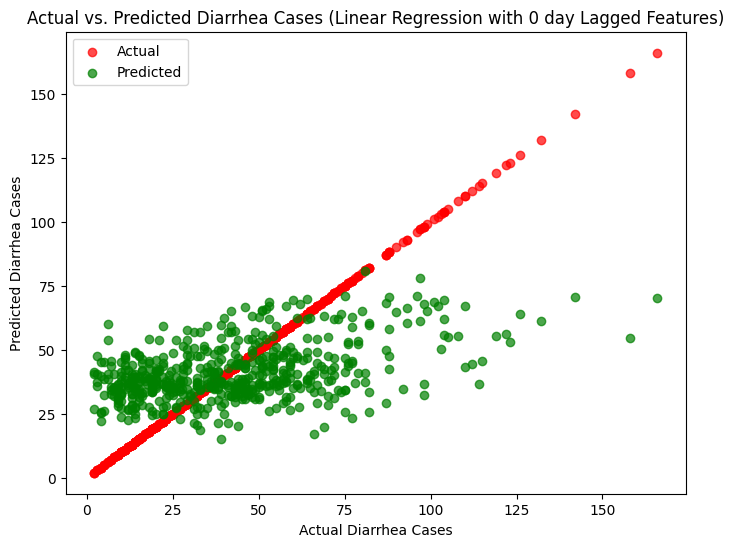

--- Linear Regression with 1 day Lagged Features ---
Mean Squared Error: 735.1159270911355
R-squared: 0.149481080550652


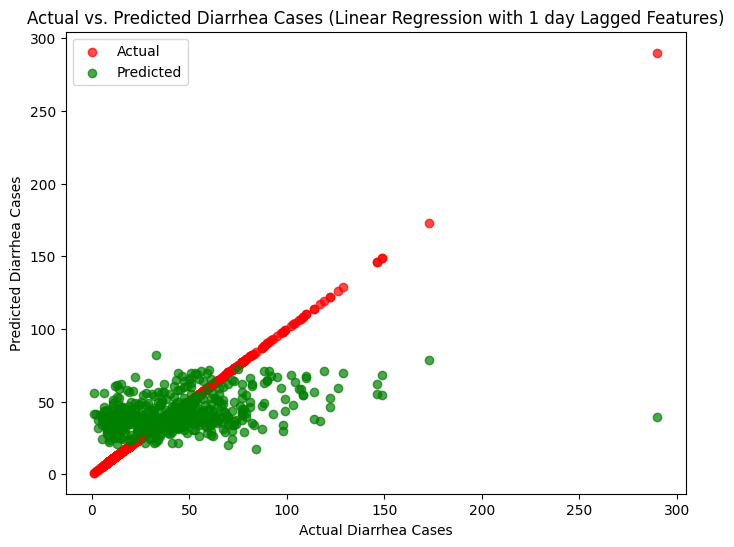

--- Linear Regression with 2 day Lagged Features ---
Mean Squared Error: 731.2098085232727
R-squared: 0.15789162674074775


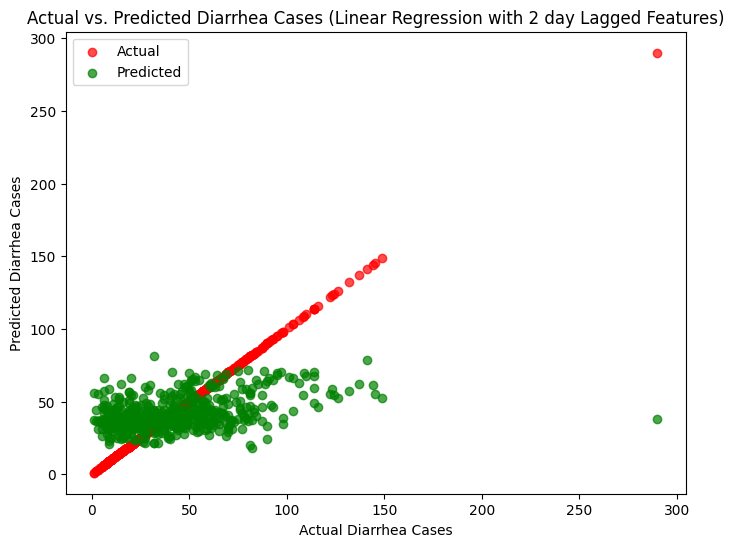

--- Linear Regression with 3 day Lagged Features ---
Mean Squared Error: 773.7136679135286
R-squared: 0.1551236002255626


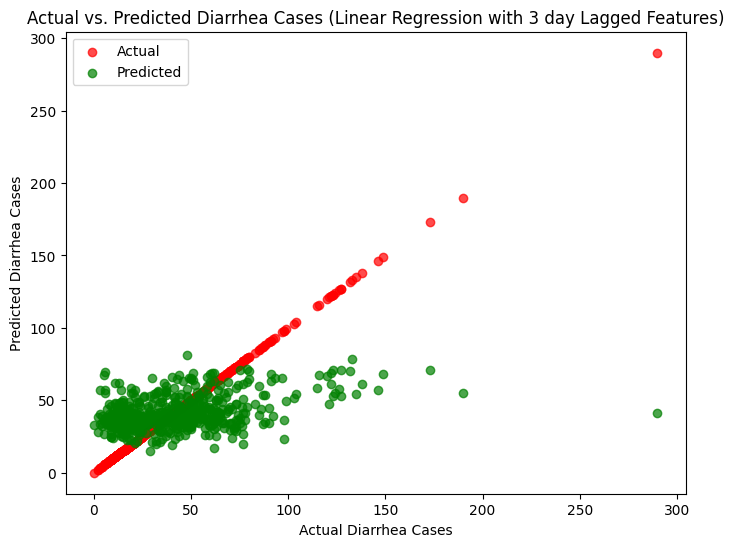

--- Linear Regression with 4 day Lagged Features ---
Mean Squared Error: 577.2818381292004
R-squared: 0.2036081163454807


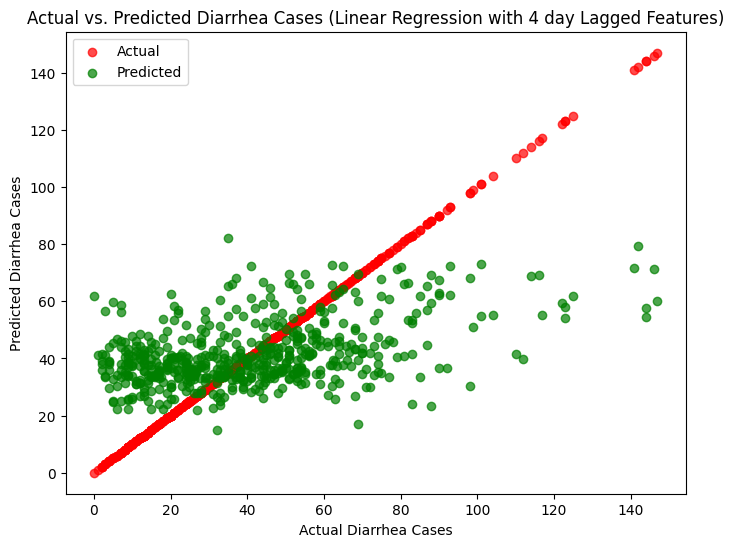

--- Linear Regression with 5 day Lagged Features ---
Mean Squared Error: 614.4866993015845
R-squared: 0.20004162346862642


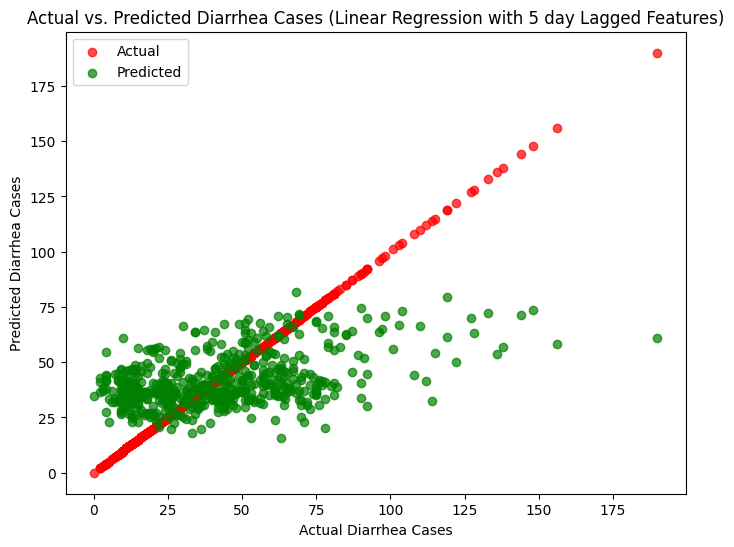

--- Linear Regression with 6 day Lagged Features ---
Mean Squared Error: 819.7697732871133
R-squared: 0.13656359490919368


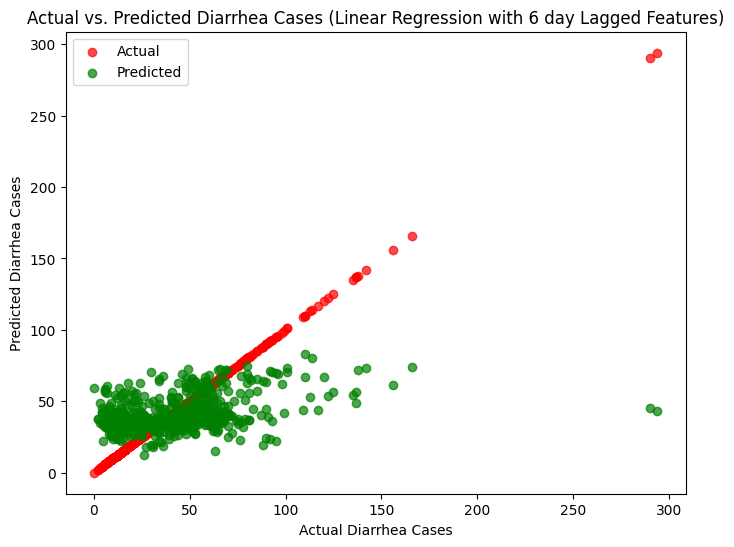

--- Linear Regression with 7 day Lagged Features ---
Mean Squared Error: 757.5009519021091
R-squared: 0.15267754085175544


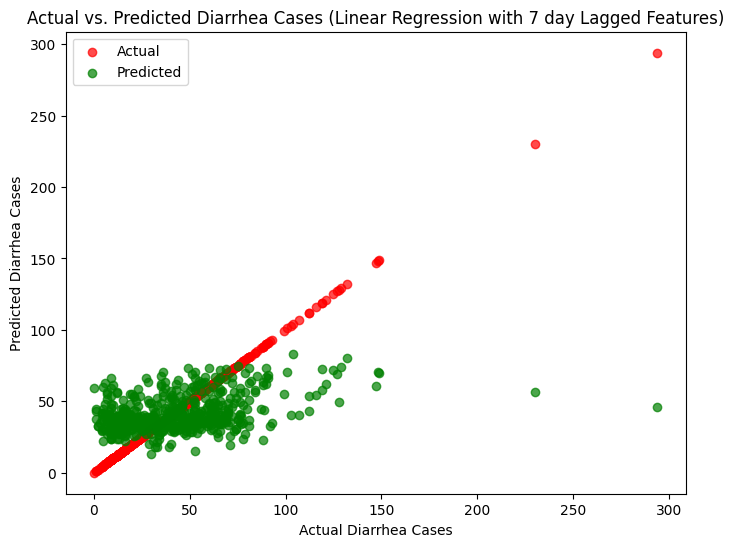

--- Linear Regression with 8 day Lagged Features ---
Mean Squared Error: 753.3102549968927
R-squared: 0.15651777230206898


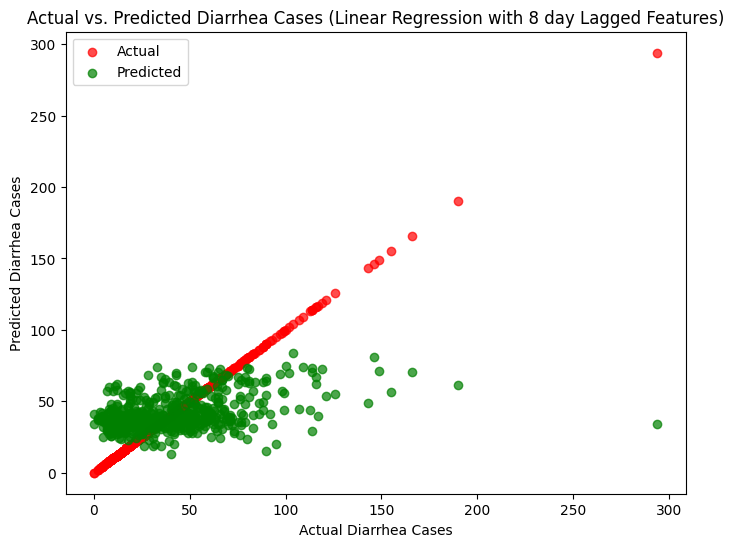

--- Linear Regression with 9 day Lagged Features ---
Mean Squared Error: 737.577837143892
R-squared: 0.14420523105196337


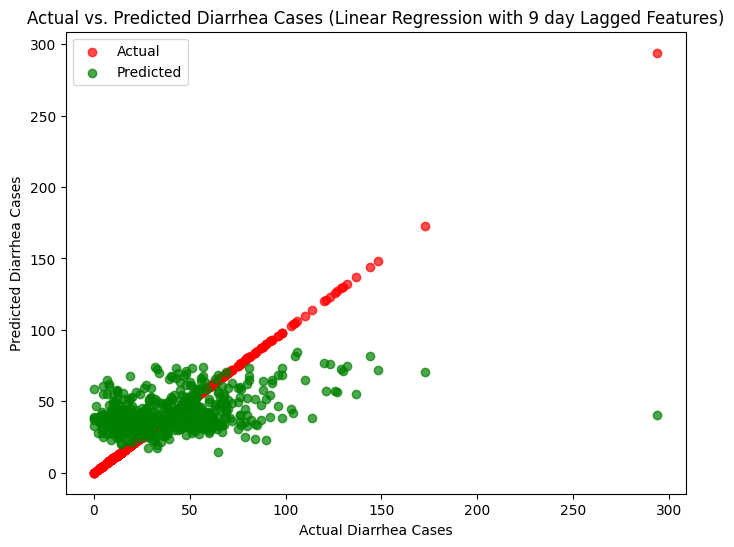

In [119]:
i = 0
while i < 10:
  # Create lagged dataset
  X_lagged = X.shift(i)  # Shift features back by one time step
  y_current = y  # Current time step's diarrhea

  # Remove first row (which will have NaN after shifting)
  X_lagged = X_lagged.iloc[i:]
  y_current = y_current.iloc[i:]

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_current, test_size=0.2, random_state=42)

  # Train Random Forest model
  rf_model = LinearRegression()
  rf_model.fit(X_train, y_train)

  # Make predictions
  rf_y_pred = rf_model.predict(X_test)

  # Plot actual vs predicted
  plot_actual_vs_predicted(y_test, rf_y_pred, f"Linear Regression with {i} day Lagged Features")

  i+=1

In [120]:
### Decision Tree

--- Random Forest with 0 day Lagged Features ---
Mean Squared Error: 1092.1848837026312
R-squared: -0.5058899890217985


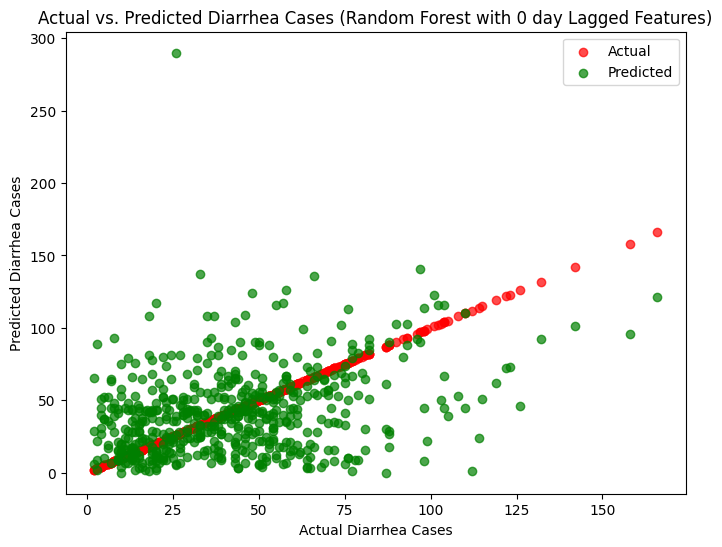

--- Random Forest with 1 day Lagged Features ---
Mean Squared Error: 1238.7779376911515
R-squared: -0.43324887160572967


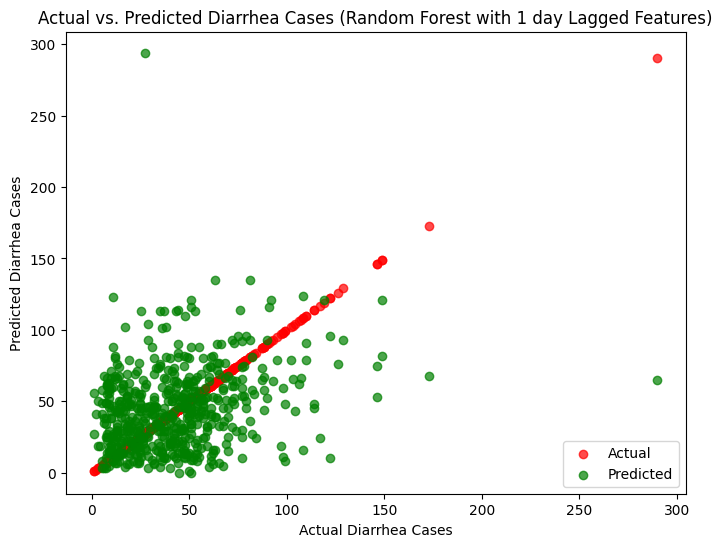

--- Random Forest with 2 day Lagged Features ---
Mean Squared Error: 1107.4059080948427
R-squared: -0.27536006346357955


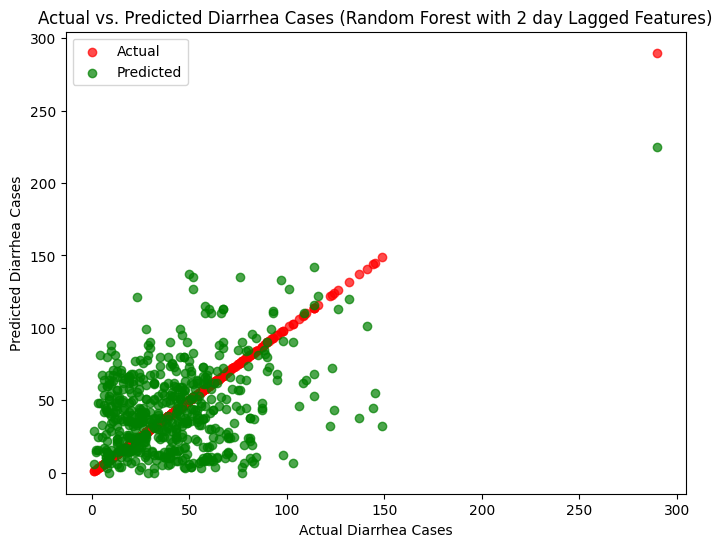

--- Random Forest with 3 day Lagged Features ---
Mean Squared Error: 1176.4595743954092
R-squared: -0.28466507820105735


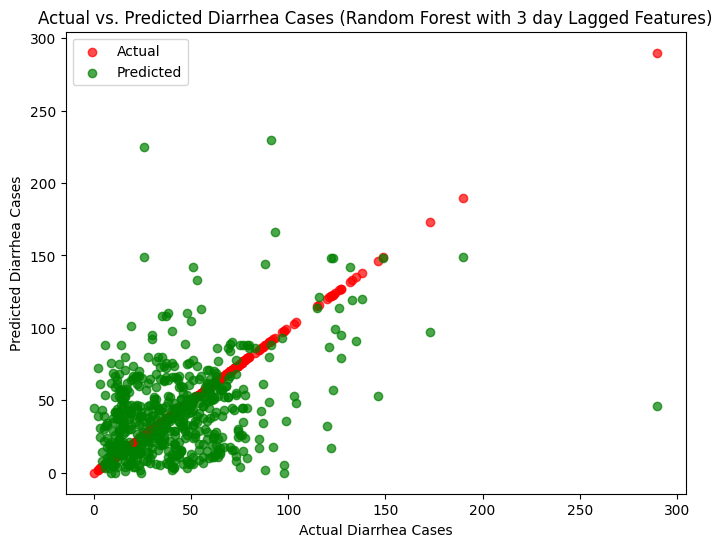

--- Random Forest with 4 day Lagged Features ---
Mean Squared Error: 1295.3053702428874
R-squared: -0.7869446353250311


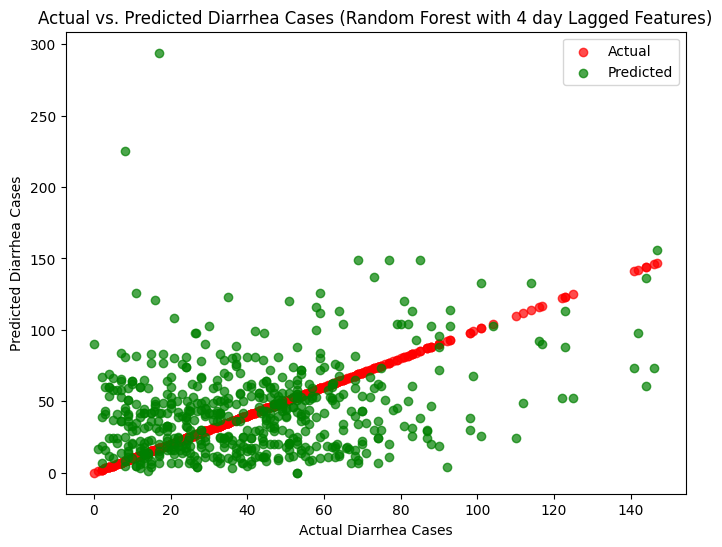

--- Random Forest with 5 day Lagged Features ---
Mean Squared Error: 1488.313765804492
R-squared: -0.9375343115082237


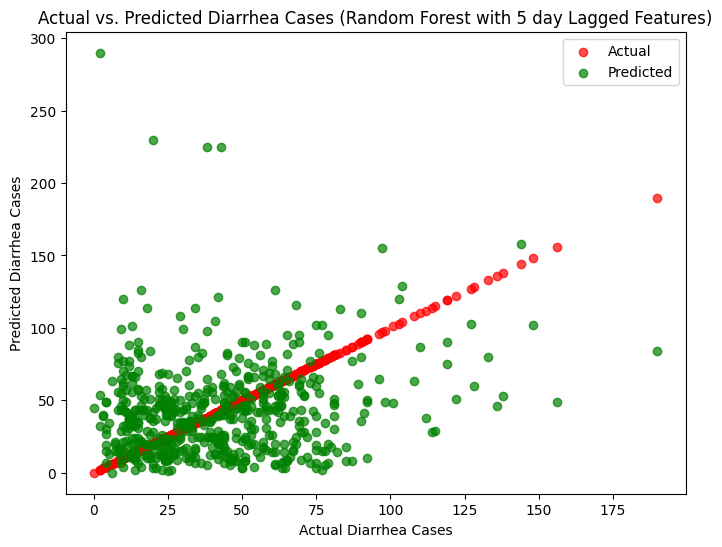

--- Random Forest with 6 day Lagged Features ---
Mean Squared Error: 1277.7880153825097
R-squared: -0.3458518799077239


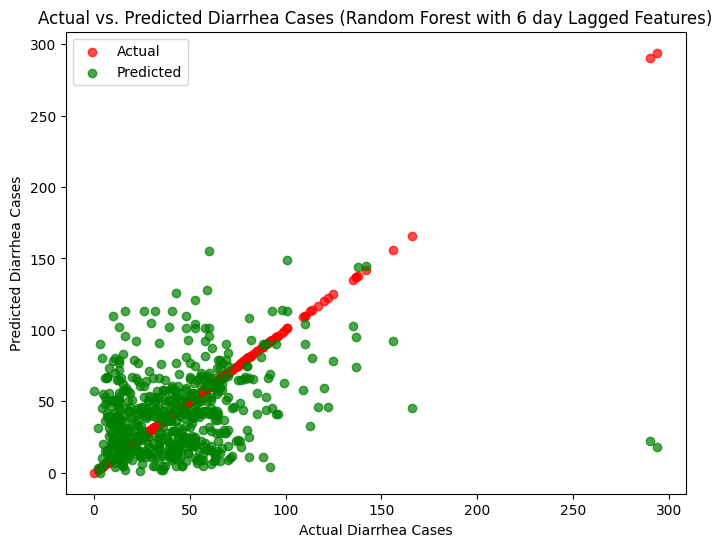

--- Random Forest with 7 day Lagged Features ---
Mean Squared Error: 1212.788889927141
R-squared: -0.35659666441387317


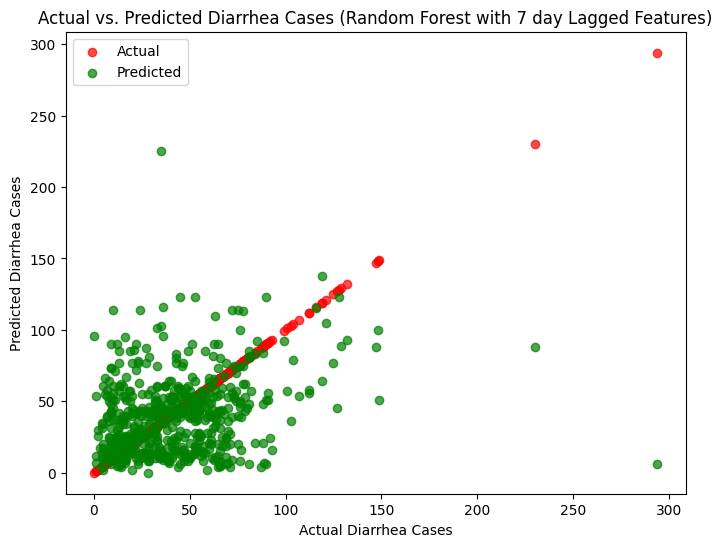

--- Random Forest with 8 day Lagged Features ---
Mean Squared Error: 1222.6547246467603
R-squared: -0.36900768841213205


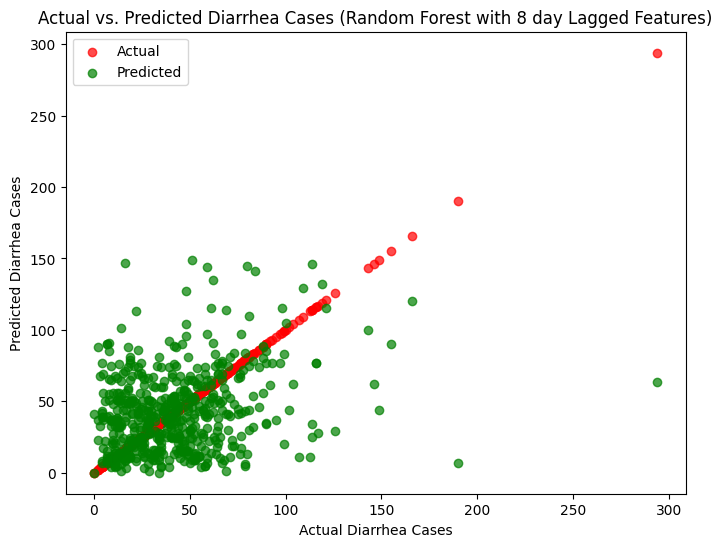

--- Random Forest with 9 day Lagged Features ---
Mean Squared Error: 1251.0508269020195
R-squared: -0.45156578659778157


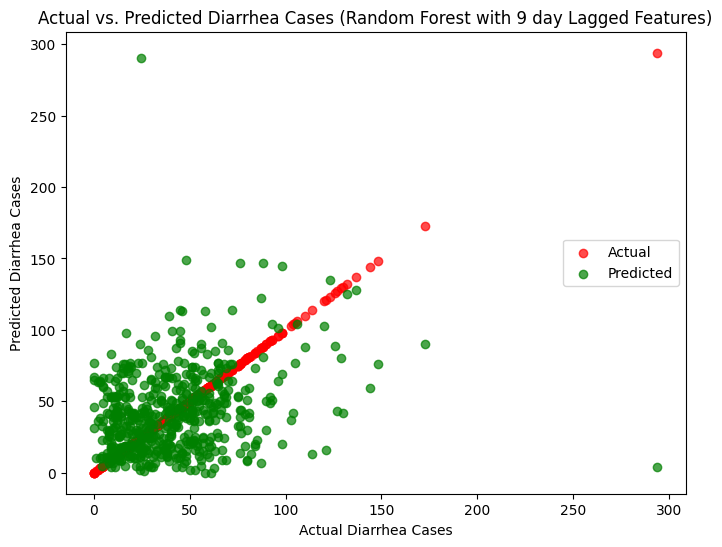

In [121]:
i = 0
while i < 10:
  # Create lagged dataset
  X_lagged = X.shift(i)  # Shift features back by one time step
  y_current = y  # Current time step's diarrhea

  # Remove first row (which will have NaN after shifting)
  X_lagged = X_lagged.iloc[i:]
  y_current = y_current.iloc[i:]

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_current, test_size=0.2, random_state=42)

  # Train Random Forest model
  rf_model = DecisionTreeRegressor(random_state=42)
  rf_model.fit(X_train, y_train)

  # Make predictions
  rf_y_pred = rf_model.predict(X_test)

  # Plot actual vs predicted
  plot_actual_vs_predicted(y_test, rf_y_pred, f"Random Forest with {i} day Lagged Features")

  i+=1

### RFGBT

--- Gradient Boosting Regressor with 0 day Lagged Features ---
Mean Squared Error: 511.01546033038557
R-squared: 0.2954186810038161


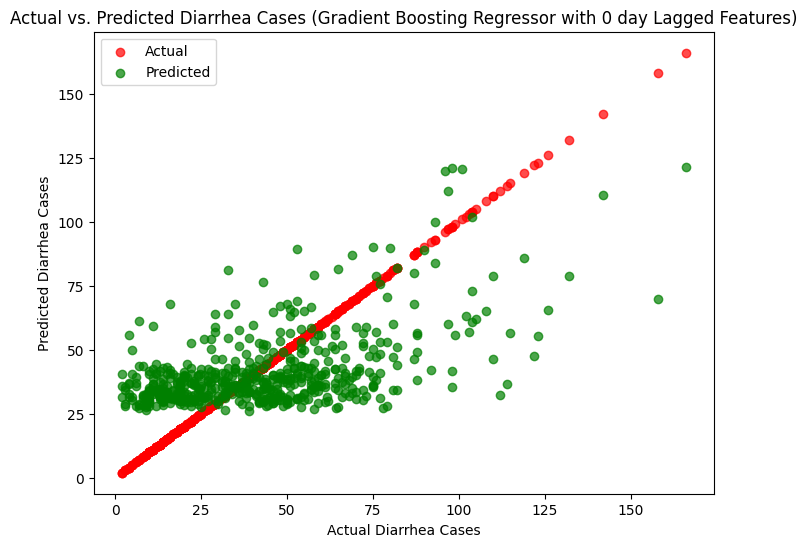

--- Gradient Boosting Regressor with 1 day Lagged Features ---
Mean Squared Error: 653.4940850211427
R-squared: 0.24391641838306066


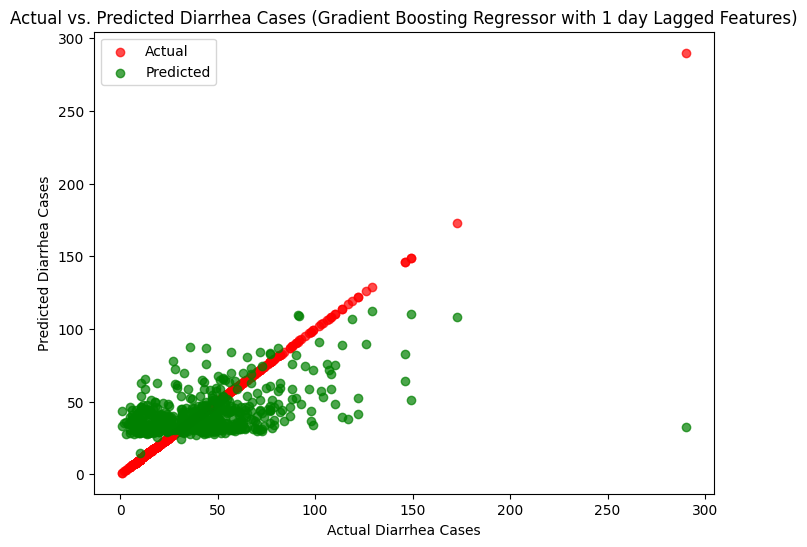

--- Gradient Boosting Regressor with 2 day Lagged Features ---
Mean Squared Error: 651.5284803251551
R-squared: 0.2496577831652177


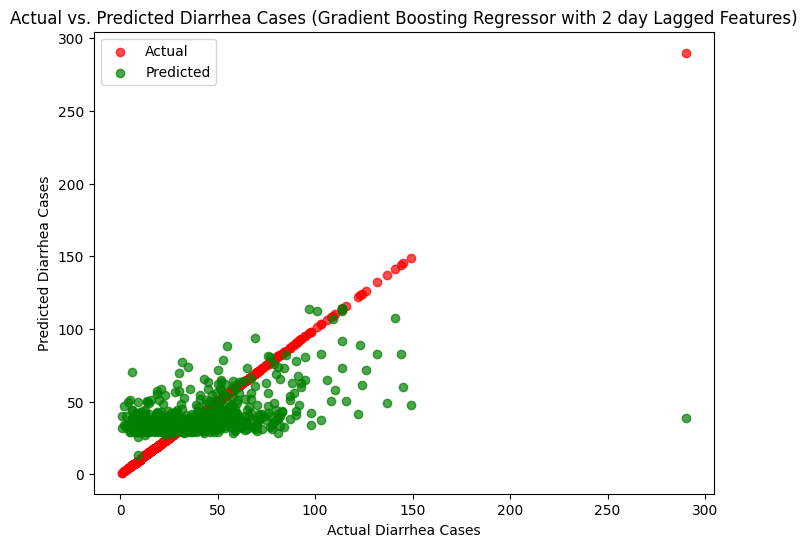

--- Gradient Boosting Regressor with 3 day Lagged Features ---
Mean Squared Error: 708.0664819030674
R-squared: 0.2268087215720812


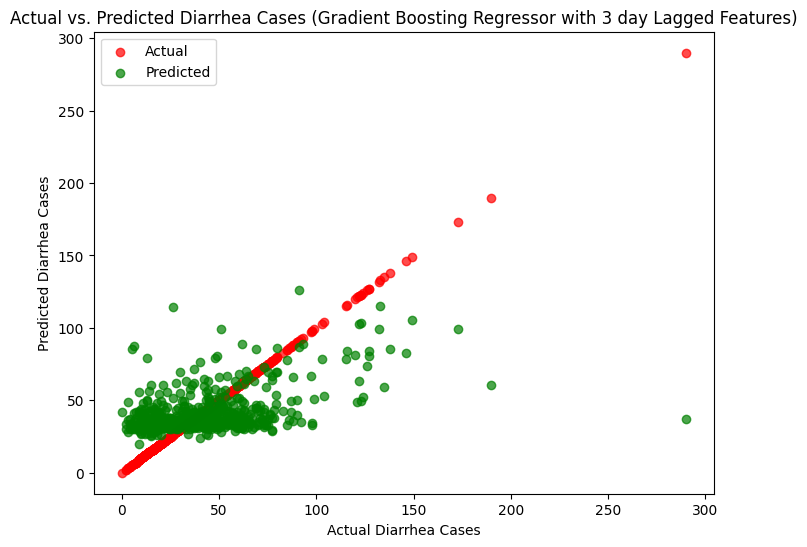

--- Gradient Boosting Regressor with 4 day Lagged Features ---
Mean Squared Error: 525.9695992263422
R-squared: 0.27439615763707614


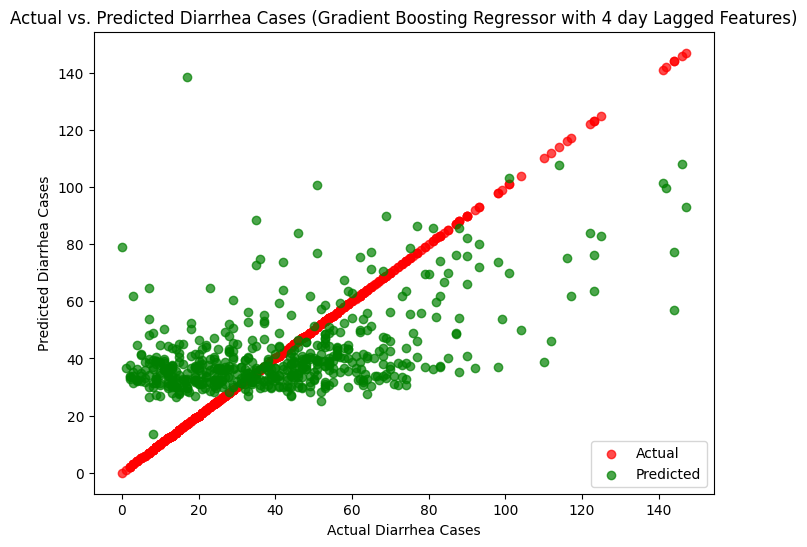

--- Gradient Boosting Regressor with 5 day Lagged Features ---
Mean Squared Error: 572.7377326428114
R-squared: 0.2543917593270162


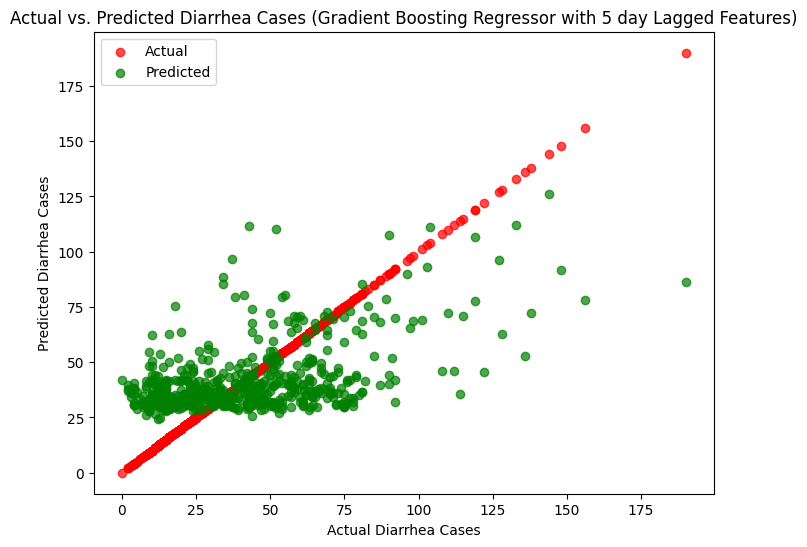

--- Gradient Boosting Regressor with 6 day Lagged Features ---
Mean Squared Error: 769.6533082269971
R-squared: 0.18934961098033043


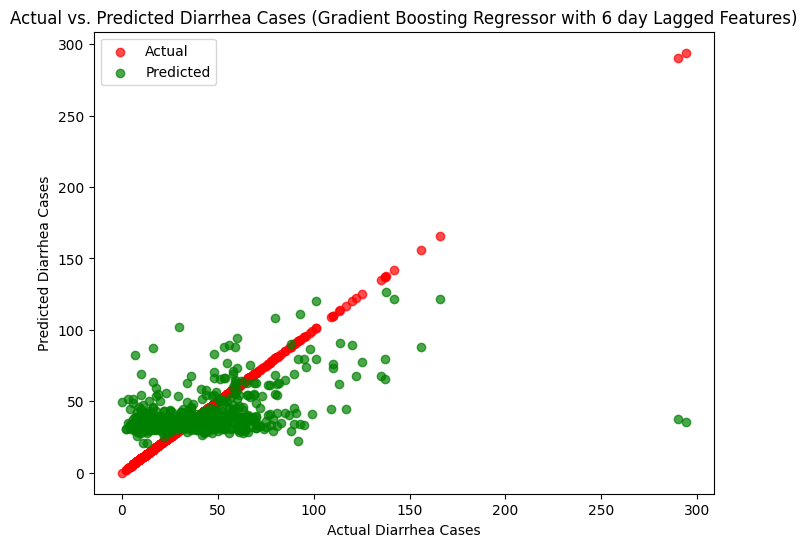

--- Gradient Boosting Regressor with 7 day Lagged Features ---
Mean Squared Error: 724.2515892938852
R-squared: 0.18986948314511998


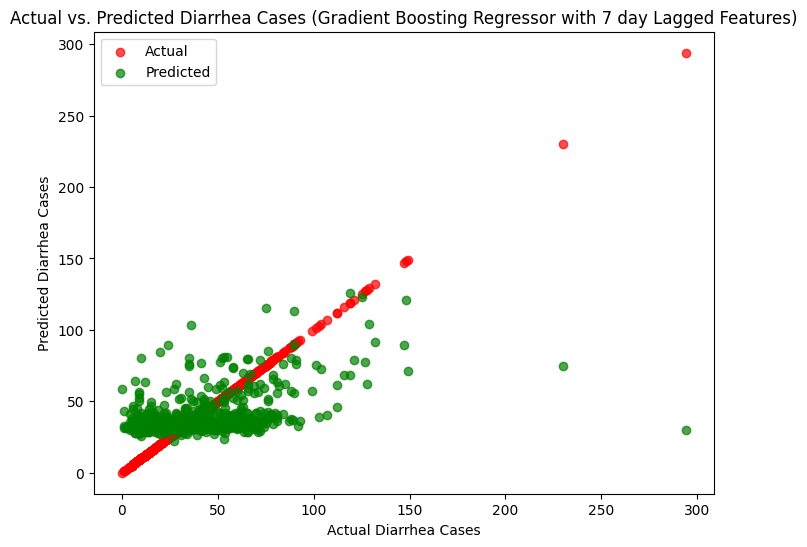

--- Gradient Boosting Regressor with 8 day Lagged Features ---
Mean Squared Error: 688.7589726683943
R-squared: 0.2287959061228073


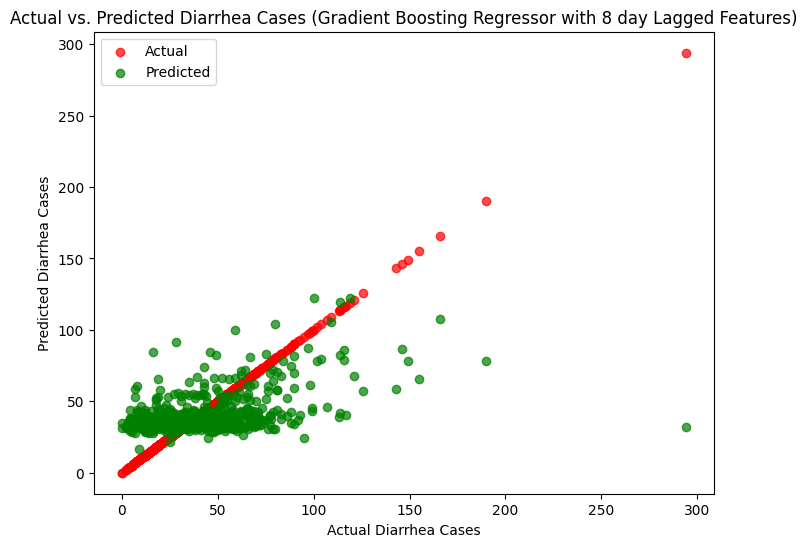

--- Gradient Boosting Regressor with 9 day Lagged Features ---
Mean Squared Error: 690.1349766284633
R-squared: 0.19925210177987873


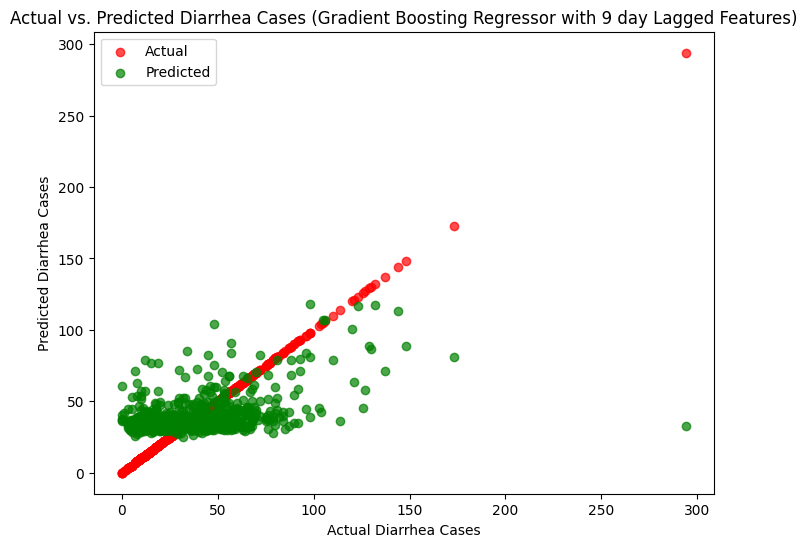

In [122]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

i = 0
while i < 10:
  # Create lagged dataset
  X_lagged = X.shift(i)  # Shift features back by one time step
  y_current = y  # Current time step's diarrhea

  # Remove first row (which will have NaN after shifting)
  X_lagged = X_lagged.iloc[i:]
  y_current = y_current.iloc[i:]

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_current, test_size=0.2, random_state=42)

  # Train Gradient Boosting Regressor model
  gbr_model = GradientBoostingRegressor(random_state=42)
  gbr_model.fit(X_train, y_train)

  # Make predictions
  gbr_y_pred = gbr_model.predict(X_test)

  # Plot actual vs predicted
  plot_actual_vs_predicted(y_test, gbr_y_pred, f"Gradient Boosting Regressor with {i} day Lagged Features")

  i+=1

### RFXBT

--- Gradient Boosting Regressor with 0 day Lagged Features ---
Mean Squared Error: 511.01546033038557
R-squared: 0.2954186810038161


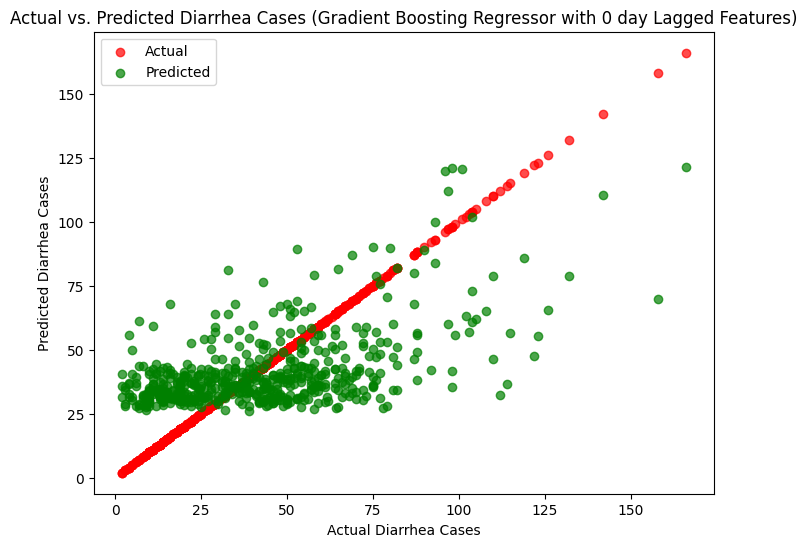

--- Gradient Boosting Regressor with 1 day Lagged Features ---
Mean Squared Error: 653.4940850211427
R-squared: 0.24391641838306066


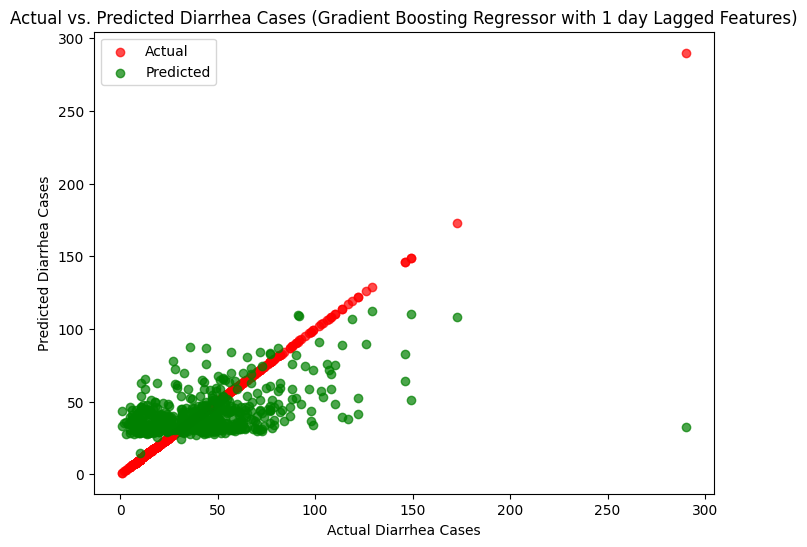

--- Gradient Boosting Regressor with 2 day Lagged Features ---
Mean Squared Error: 651.5284803251551
R-squared: 0.2496577831652177


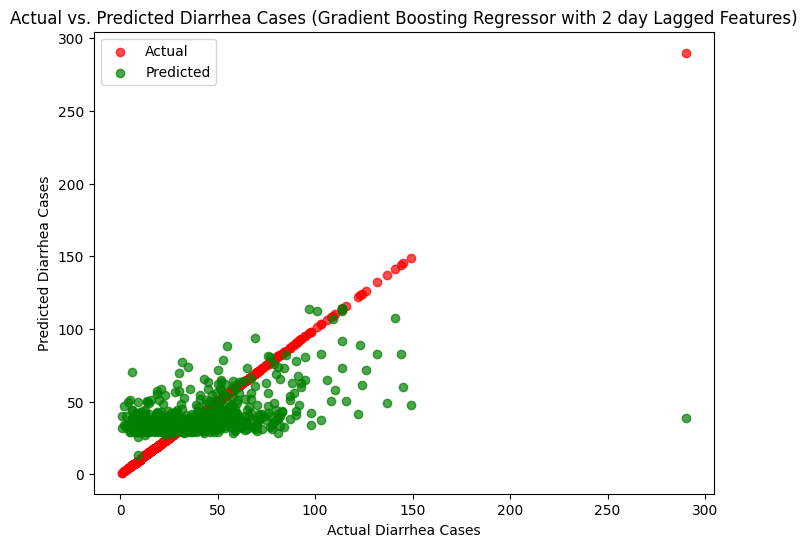

--- Gradient Boosting Regressor with 3 day Lagged Features ---
Mean Squared Error: 708.0664819030674
R-squared: 0.2268087215720812


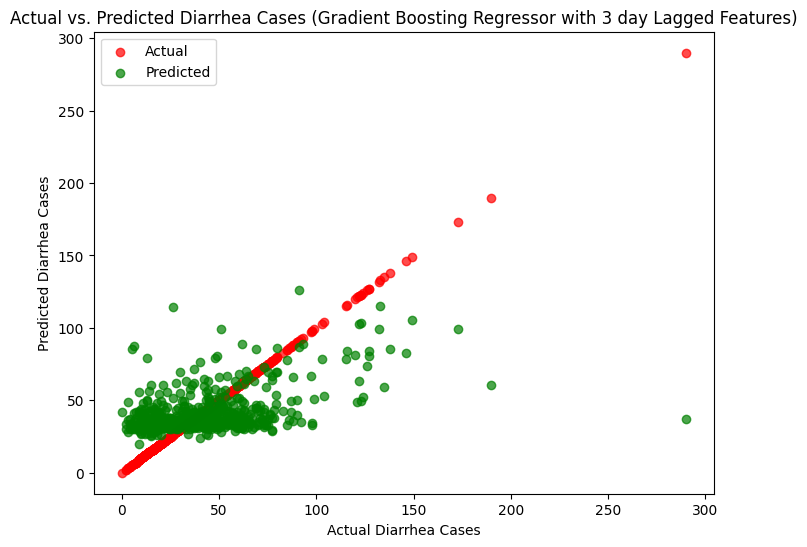

--- Gradient Boosting Regressor with 4 day Lagged Features ---
Mean Squared Error: 525.9695992263422
R-squared: 0.27439615763707614


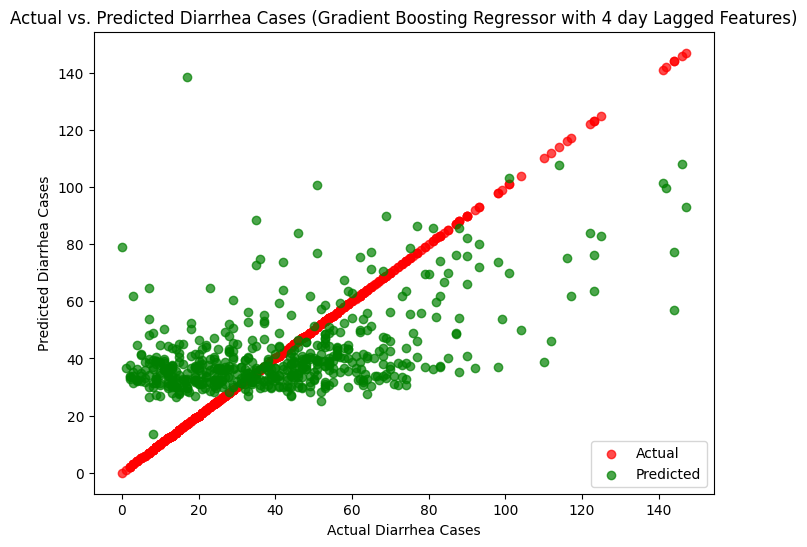

--- Gradient Boosting Regressor with 5 day Lagged Features ---
Mean Squared Error: 572.7377326428114
R-squared: 0.2543917593270162


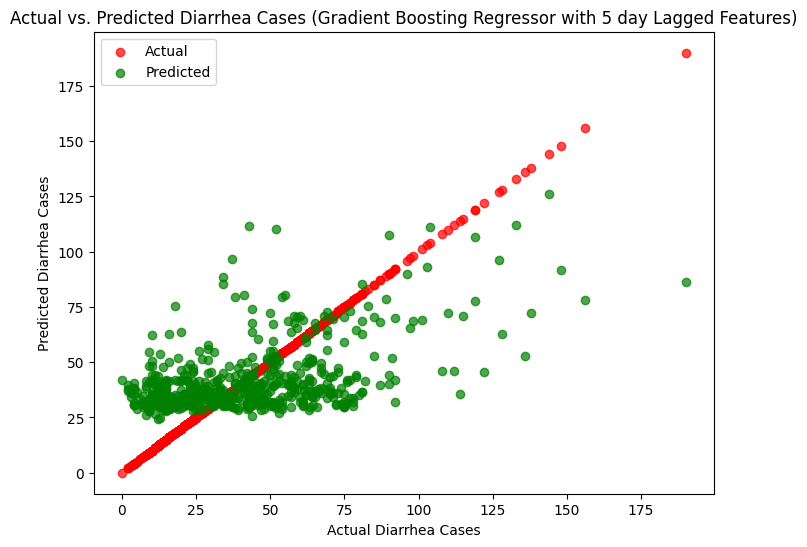

--- Gradient Boosting Regressor with 6 day Lagged Features ---
Mean Squared Error: 769.6533082269971
R-squared: 0.18934961098033043


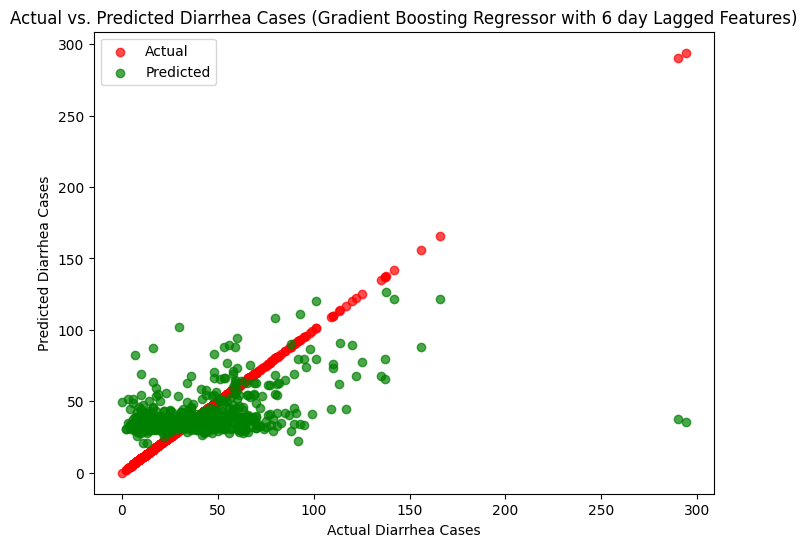

--- Gradient Boosting Regressor with 7 day Lagged Features ---
Mean Squared Error: 724.2515892938852
R-squared: 0.18986948314511998


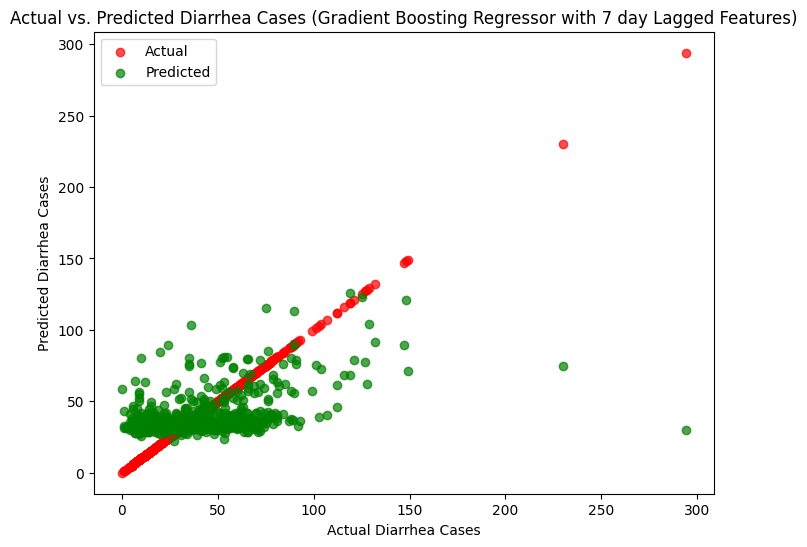

--- Gradient Boosting Regressor with 8 day Lagged Features ---
Mean Squared Error: 688.7589726683943
R-squared: 0.2287959061228073


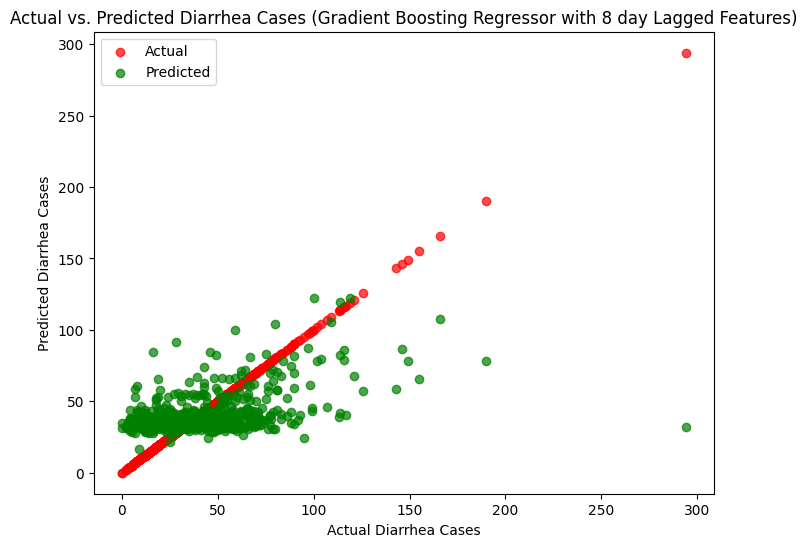

--- Gradient Boosting Regressor with 9 day Lagged Features ---
Mean Squared Error: 690.1349766284633
R-squared: 0.19925210177987873


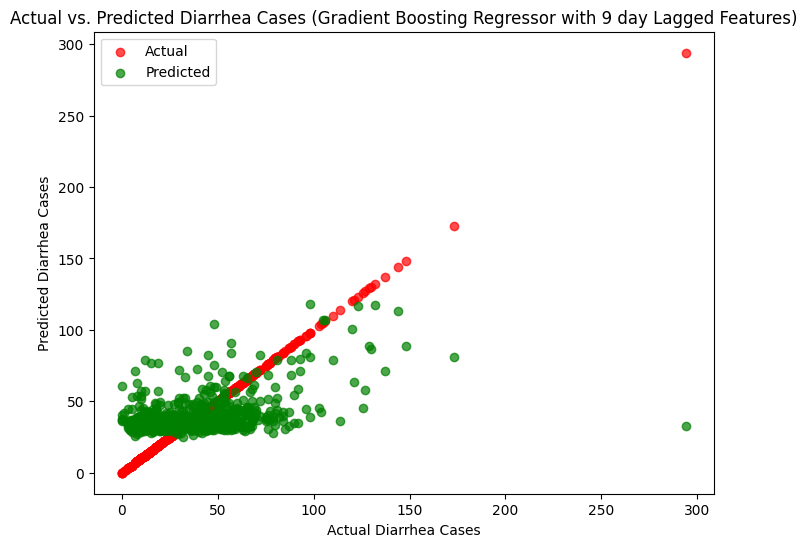

In [123]:
i = 0
while i < 10:
  # Create lagged dataset
  X_lagged = X.shift(i)  # Shift features back by one time step
  y_current = y  # Current time step's diarrhea

  # Remove first row (which will have NaN after shifting)
  X_lagged = X_lagged.iloc[i:]
  y_current = y_current.iloc[i:]

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_current, test_size=0.2, random_state=42)

  # Train Gradient Boosting Regressor model
  gbr_model = GradientBoostingRegressor(random_state=42)
  gbr_model.fit(X_train, y_train)

  # Make predictions
  gbr_y_pred = gbr_model.predict(X_test)

  # Plot actual vs predicted
  plot_actual_vs_predicted(y_test, gbr_y_pred, f"Gradient Boosting Regressor with {i} day Lagged Features")

  i+=1